**Flight Price Prediction ✈:**

Registering to Kaggle API

In [67]:
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"tairsto","key":"e464902c315c66fda096bfc2849c9bd8"}

# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


Downloading the flight dataset

In [ ]:

!mkdir ./datasets/flight-dataset

# download the dataset from Kaggle and unzip it
!kaggle datasets download viveksharmar/flight-price-data -p ./datasets/flight-dataset
!unzip ./datasets/flight-dataset/*.zip -d ./datasets/flight-dataset

mkdir: cannot create directory ‘./datasets/flight-dataset’: File exists
Dataset URL: https://www.kaggle.com/datasets/viveksharmar/flight-price-data
License(s): MIT
flight-price-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./datasets/flight-dataset/flight-price-data.zip
replace ./datasets/flight-dataset/flight_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Load flight price dataset into Pandas Dataframe.

In [68]:
import pandas as pd
df = pd.read_csv("/content/datasets/flight-dataset/flight_dataset.csv")
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


Deleting a year column

In [69]:
df = df.drop(columns='Year')
df = df.dropna()


Checking for empty values

In [70]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int64 
 6   Month           10683 non-null  int64 
 7   Dep_hours       10683 non-null  int64 
 8   Dep_min         10683 non-null  int64 
 9   Arrival_hours   10683 non-null  int64 
 10  Arrival_min     10683 non-null  int64 
 11  Duration_hours  10683 non-null  int64 
 12  Duration_min    10683 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


,0
Airline,0
Source,0
Destination,0
Total_Stops,0
Price,0
Date,0
Month,0
Dep_hours,0
Dep_min,0
Arrival_hours,0


The data set after deleting the year column

In [71]:
df

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


A diagram showing that there are no empty columns

<Axes: >

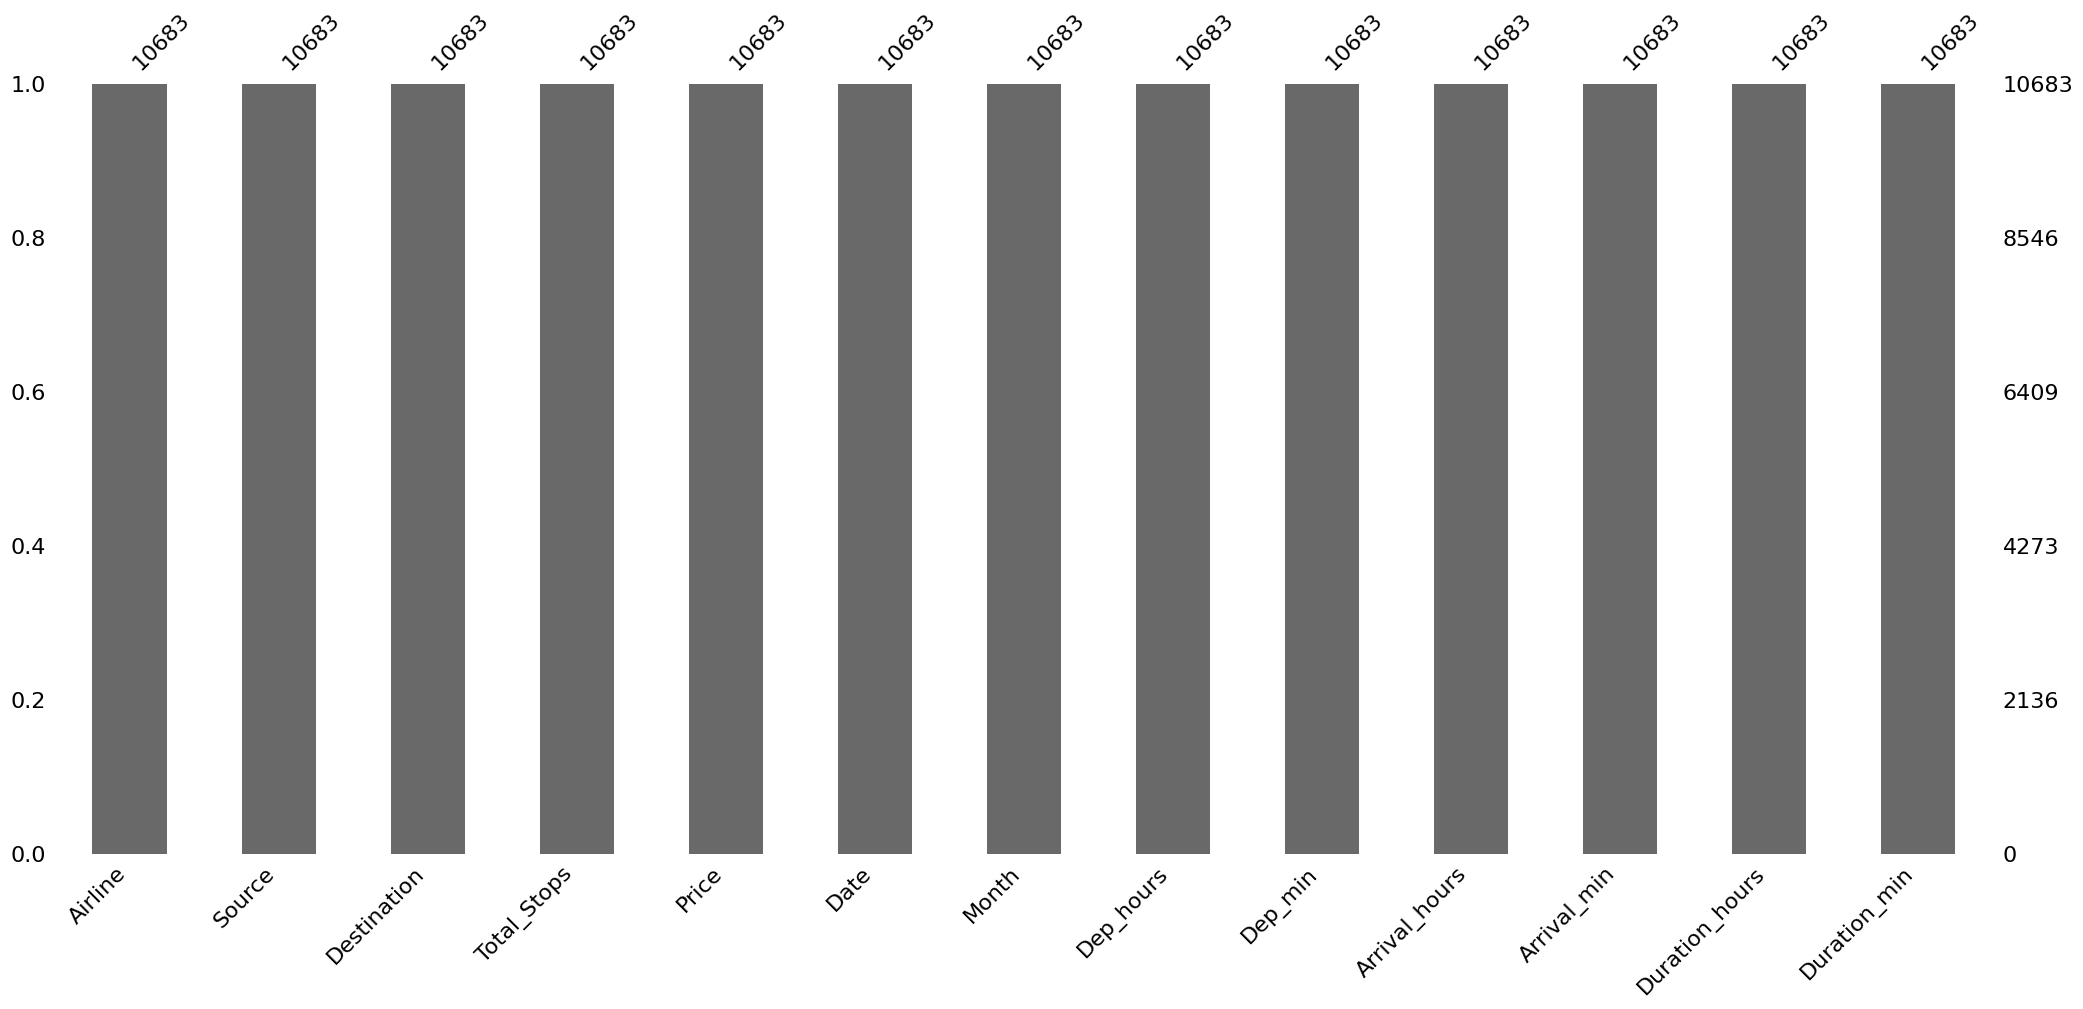

In [72]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)

Present the count, mean, std, min, etc. for all numeric features in the dataset.

In [73]:
df.describe()

,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,0.824207,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630,10.246560,28.327249
std,0.675199,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036,8.494988,16.946113
min,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


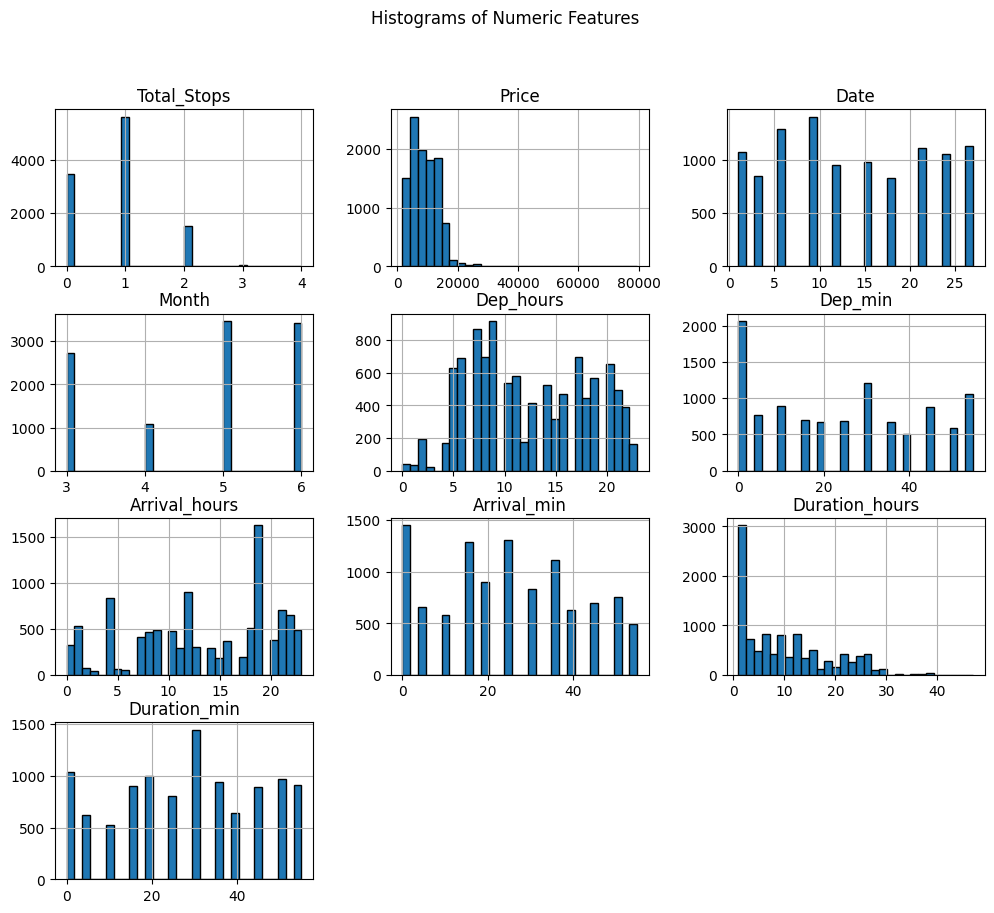

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting histograms for all numeric features
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.show()





Removing columns:Airline,Source,Destination and creating new columns

In [75]:
airline_dummies = pd.get_dummies(df['Airline'], prefix='is_airline', dtype=int)

source_dummies = pd.get_dummies(df['Source'], prefix='is_source', dtype=int)
dermination_dummies = pd.get_dummies(df['Destination'], prefix='is_destination', dtype=int)
# create cloumns
df = pd.concat([df, airline_dummies, source_dummies,dermination_dummies], axis=1)
#remove cloumns
df = df.drop(['Airline', 'Source','Destination'], axis=1)



In [76]:
df

,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,...,is_source_Chennai,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


**Selecting the price column**

In [77]:
targetClass=df['Price']
Features = df.drop(columns=['Price'])


**traning-test**

**LinearRegression**



**Without normalization**

**regression**

LinearRegression without normalization:
Mean Squared Error (MSE): 8417540.318779973
R-squared (R2): 0.6171605142472703


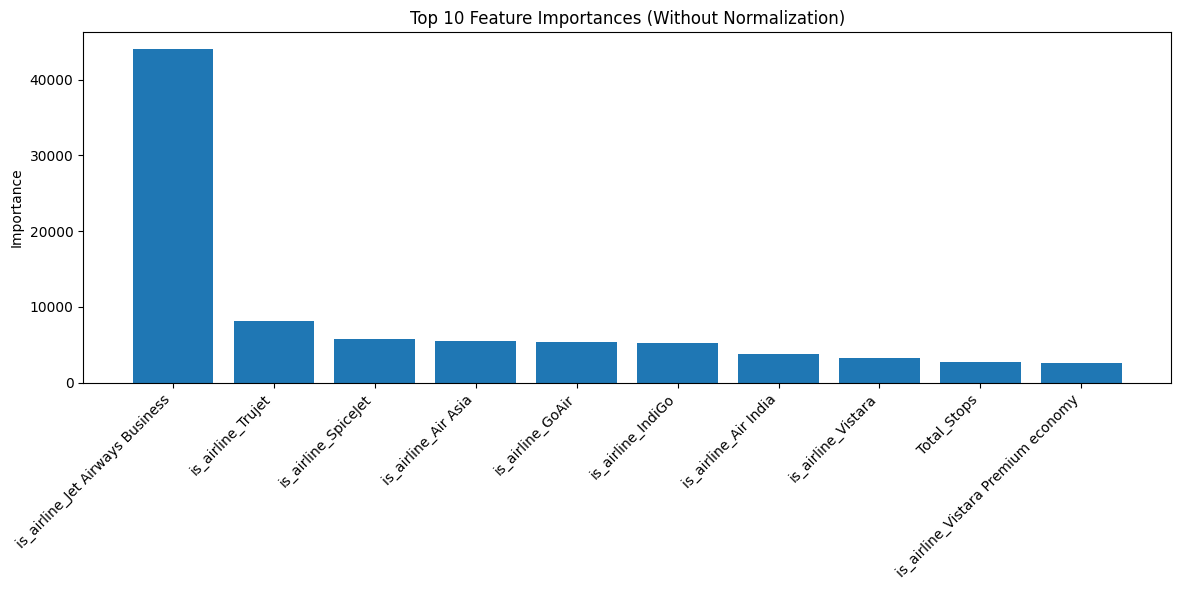

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined

print("LinearRegression without normalization:")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(Features, targetClass, test_size=0.2, random_state=1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Feature importance
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances (Without Normalization)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




**With normalization**



LinearRegression with price normalization:
Mean Squared Error (MSE) on scaled data: 0.39588401011984375
R-squared (R2) on scaled data: 0.6171605142472701
Mean Squared Error (MSE) on original scale: 8417540.318779975
R-squared (R2) on original scale: 0.6171605142472701


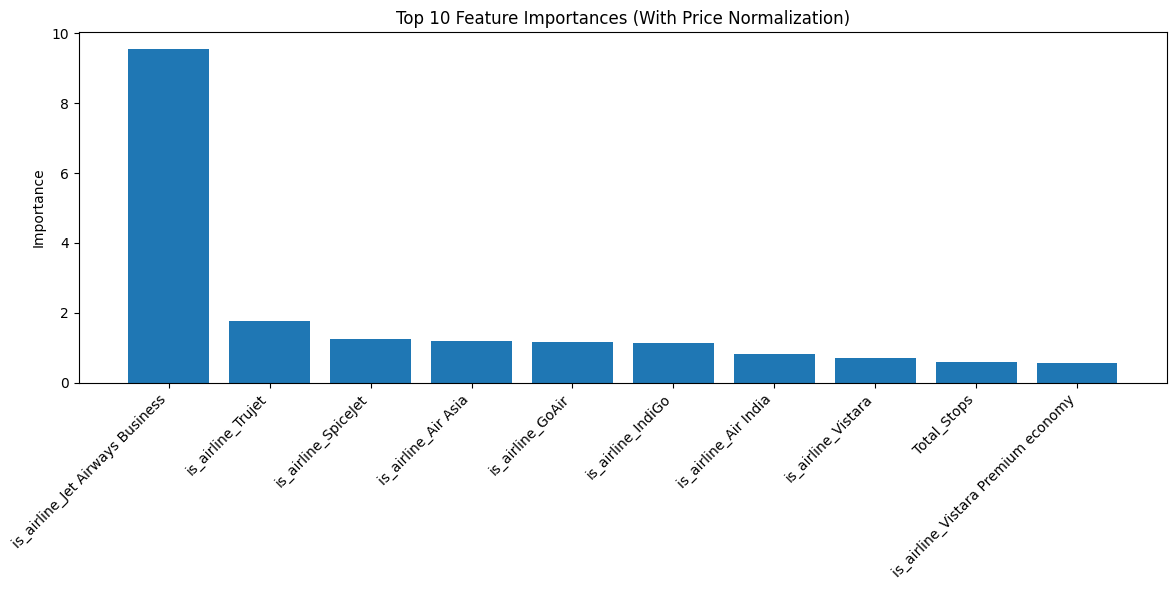

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming Features and targetClass are already defined

print("LinearRegression with price normalization:")

# Normalize only the price (target variable)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(targetClass.values.reshape(-1, 1)).flatten()

# Split the data after normalization
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(Features, y_scaled, test_size=0.2, random_state=1)

# Create and train the model
model_normalized = LinearRegression()
model_normalized.fit(X_train, y_train_scaled)

# Make predictions
y_pred_scaled = model_normalized.predict(X_test)

# Evaluate the model on scaled data
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"R-squared (R2) on scaled data: {r2_scaled}")

# Transform predictions and test data back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluate the model on original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE) on original scale: {mse_original}")
print(f"R-squared (R2) on original scale: {r2_original}")

# Feature importance for normalized model
feature_importance_normalized = pd.DataFrame({'feature': X_train.columns, 'importance': abs(model_normalized.coef_)})
feature_importance_normalized = feature_importance_normalized.sort_values('importance', ascending=False)

# Visualize feature importance for normalized model
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_normalized['feature'][:10], feature_importance_normalized['importance'][:10])
plt.title('Top 10 Feature Importances (With Price Normalization)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**DecisionTreeRegressor**

**Without normalization**


DecisionTreeRegressor without normalization:
Mean Squared Error (MSE): 5855995.425894816
R-squared (R2): 0.7336625436271331


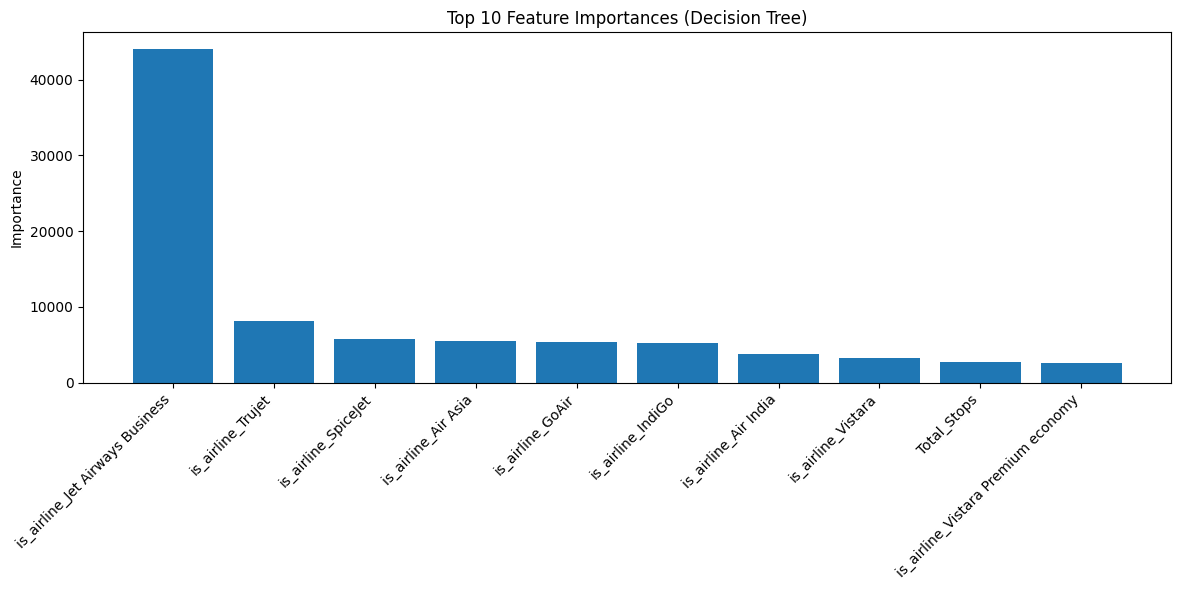

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined

print("DecisionTreeRegressor without normalization:")

# Split the data
x_train, x_test, y_train, y_test = train_test_split(Features, targetClass, test_size=0.2, random_state=1)

# Create and train the decision tree model
model1 = DecisionTreeRegressor(random_state=1)
model1.fit(x_train, y_train)

# Make predictions
y_pred = model1.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Feature importance
feature_importance1 = pd.DataFrame({'feature': x_train.columns, 'importance': model1.feature_importances_})
feature_importance1 = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance1['feature'][:10], feature_importance1['importance'][:10])
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**With normalization**


DecisionTreeRegressor with price normalization:
Mean Squared Error (MSE) on scaled data: 0.2789005506406112
R-squared (R2) on scaled data: 0.730289325524712
Mean Squared Error (MSE) on original scale: 5930162.800049913
R-squared (R2) on original scale: 0.730289325524712


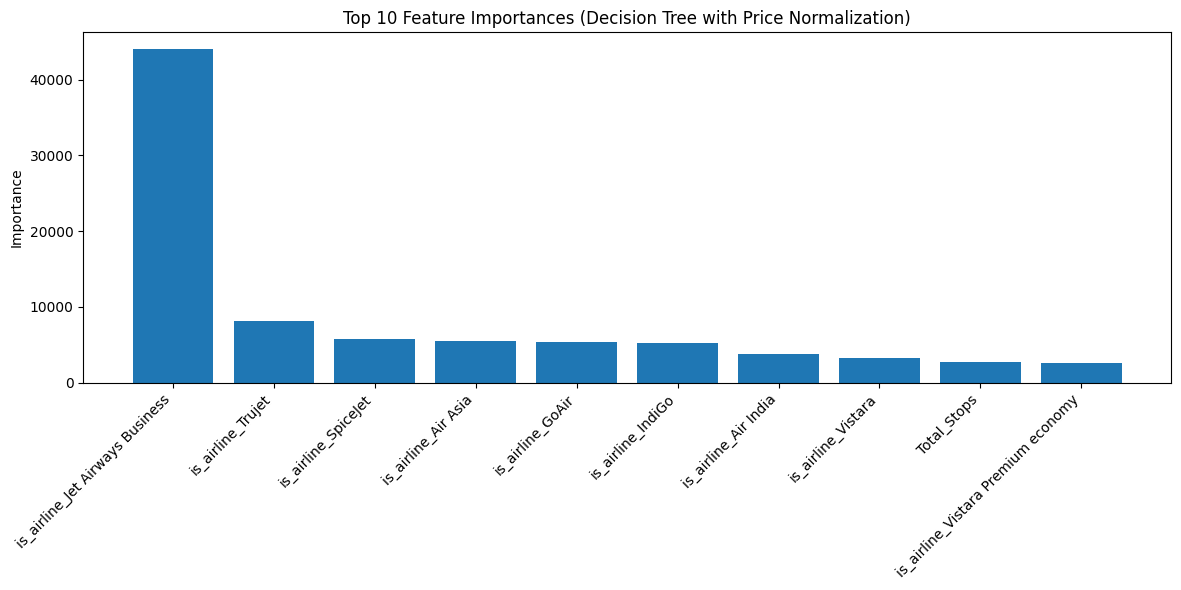

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined
print("DecisionTreeRegressor with price normalization:")

# Normalize only the price (target variable)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(targetClass.values.reshape(-1, 1)).flatten()

# Split the data after normalization
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(Features, y_scaled, test_size=0.2, random_state=1)

# Create and train the decision tree model
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train_scaled)

# Make predictions
y_pred_scaled = model.predict(X_test)

# Evaluate the model on scaled data
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
r2_scaled = r2_score(y_test_scaled, y_pred_scaled)

print(f"Mean Squared Error (MSE) on scaled data: {mse_scaled}")
print(f"R-squared (R2) on scaled data: {r2_scaled}")

# Transform predictions and test data back to original scale
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

# Evaluate the model on original scale
mse_original = mean_squared_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)

print(f"Mean Squared Error (MSE) on original scale: {mse_original}")
print(f"R-squared (R2) on original scale: {r2_original}")

# Feature importance
feature_importance2 = pd.DataFrame({'feature': X_train.columns, 'importance': model.feature_importances_})
feature_importance2 = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance2['feature'][:10], feature_importance2['importance'][:10])
plt.title('Top 10 Feature Importances (Decision Tree with Price Normalization)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**calssification**

In [82]:
df

,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,...,is_source_Chennai,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,...,0,0,1,0,1,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,...,0,0,1,0,1,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,...,0,0,0,0,0,0,0,0,0,1


In [83]:
#create category
price_categories = pd.cut(df['Price'], bins=[0, 5000, 10000, 20000, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])

df['Price Category'] = price_categories
df.drop(columns=['Price'],inplace=True)

df


,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,is_airline_Air Asia,...,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi,Price Category
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,Low
1,2,1,5,5,50,13,15,7,25,0,...,0,1,0,1,0,0,0,0,0,Medium
2,2,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,High
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,1,0,0,0,0,0,Medium
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,1,...,0,1,0,1,0,0,0,0,0,Low
10679,0,27,4,20,45,23,20,2,35,0,...,0,1,0,1,0,0,0,0,0,Low
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,1,0,0,0,Medium
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,High


In [84]:
print(df['Price Category'])

0           Low
1        Medium
2          High
3        Medium
4          High
          ...  
10678       Low
10679       Low
10680    Medium
10681      High
10682      High
Name: Price Category, Length: 10683, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


Split the data into training and testing sets

In [85]:
featureNew=df.drop(columns=['Price Category'])
targetNew=df['Price Category']
x_train,x_test,y_train,y_test=train_test_split(featureNew,targetNew,test_size=0.2,random_state=1)

add diagram

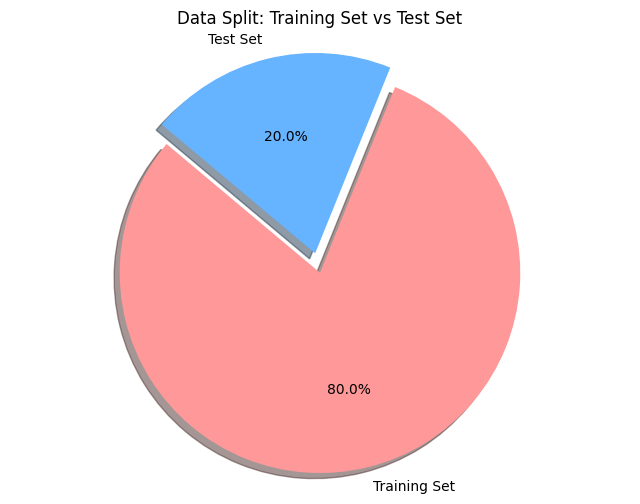

In [86]:
import matplotlib.pyplot as plt
num_train = len(x_train)
num_test = len(x_test)

labels = ['Training Set', 'Test Set']
sizes = [num_train, num_test]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Split: Training Set vs Test Set')
plt.axis('equal')
plt.show()

In [87]:
import numpy as np
from sklearn import metrics
majority_class = y_train.mode()

y_pred_majority = np.full_like(y_test, majority_class)

accuracy_majority = metrics.accuracy_score(y_test, y_pred_majority)
print("Majority Rule Accuracy:", accuracy_majority)


Majority Rule Accuracy: 0.3968179691155826


***DT (Decision Tree - עץ החלטה)***

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Create Decision Tree classifer object
clf1=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,random_state=1)
clf1.fit(x_train,y_train)
y_pred=clf1.predict(x_test)


tree decision diagram

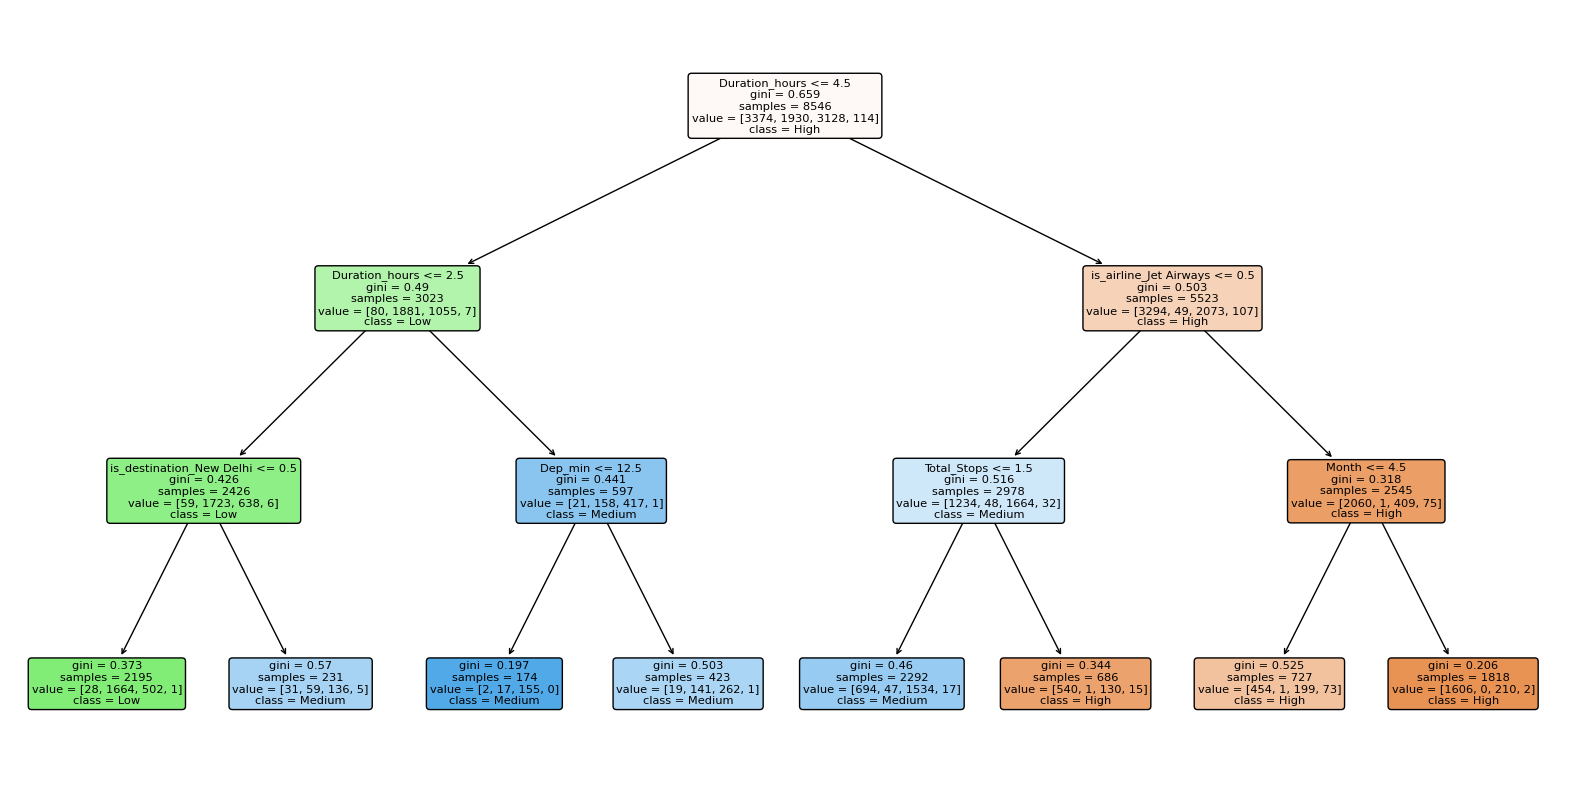

In [89]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(clf1, filled=True, feature_names=x_train.columns, class_names=clf1.classes_,rounded=True)
plt.show()

importances diagram

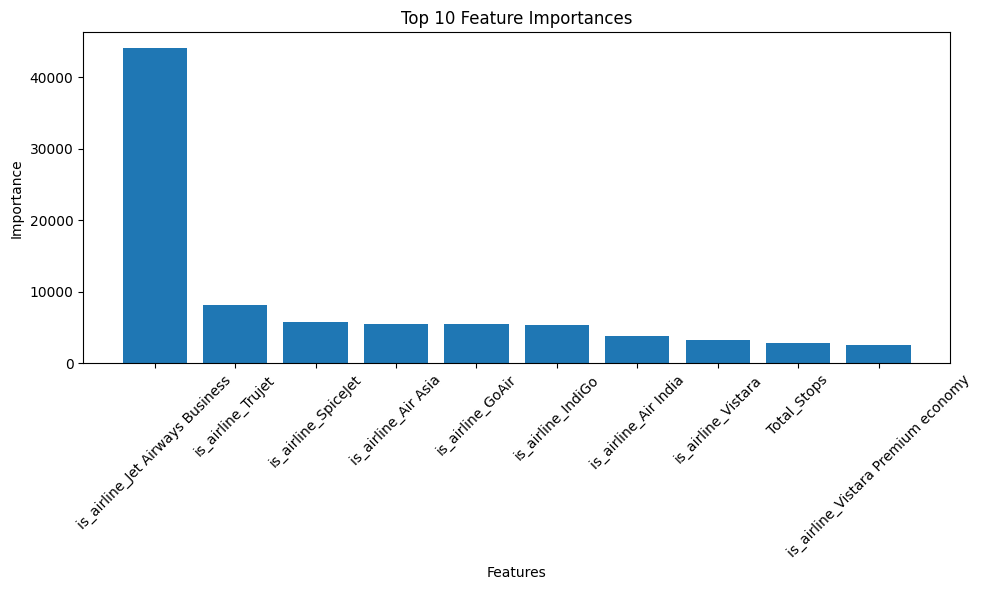

                                         feature    importance
14               is_airline_Jet Airways Business  44047.524658
18                             is_airline_Trujet   8124.665487
17                           is_airline_SpiceJet   5738.483934
9                            is_airline_Air Asia   5531.679022
11                              is_airline_GoAir   5437.472124
12                             is_airline_IndiGo   5269.873281
10                          is_airline_Air India   3767.062276
19                            is_airline_Vistara   3243.273491
0                                    Total_Stops   2786.045758
20            is_airline_Vistara Premium economy   2602.143563
15                  is_airline_Multiple carriers   1806.803845
31                      is_destination_New Delhi   1499.858948
16  is_airline_Multiple carriers Premium economy   1465.522524
28                          is_destination_Delhi   1101.683236
13                        is_airline_Jet Airways   1060

In [90]:
import matplotlib.pyplot as plt

importances = clf1.feature_importances_
feature_importance3 = pd.DataFrame({'feature': Features.columns, 'importance': importances})
feature_importance3 = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance3['feature'][:10], feature_importance3['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance3)

calc accuracy of test and train and AUC ROC

In [91]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob1 = clf1.predict_proba(x_test)
accuracy_test1=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree-Test:',accuracy_test1)
acuuracy_train1=clf1.score(x_train,y_train)
print('Accuracy of Decision Tree-Train:',acuuracy_train1)

y_prob1 = clf1.predict_proba(x_test)
for i in range(len(clf1.classes_)):
    roc_auc = roc_auc_score(y_test == clf1.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Decision Tree-Test: {roc_auc}")
    roc_auc_general= roc_auc_score(y_test, y_prob1, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")


Accuracy of Decision Tree-Test: 0.7262517547964437
Accuracy of Decision Tree-Train: 0.7431546922536859
AUC ROC of Decision Tree-Test: 0.8847326617093842
AUC ROC of Decision Tree-Test: 0.9432028487919438
AUC ROC of Decision Tree-Test: 0.7436343421399766
AUC ROC of Decision Tree-Test: 0.8860101815333837
General AUC ROC of Decision Tree-Test: 0.864395008543672


check if the model suffer from overfitting

In [92]:
if acuuracy_train1>accuracy_test1:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

The classifier suffers from overfitting


Calculation of the gap between the training accuracy and the test accuracy

In [93]:
critical_threshold = 0.05

accuracy_difference1= acuuracy_train1 - accuracy_test1

if accuracy_difference1 > critical_threshold:
    print(f"Warning: Significant difference between training and test accuracy. This may indicate overfitting.")
else:
    print(f"No significant difference between training and test accuracy.")


No significant difference between training and test accuracy.


***RF (Random Forest - יער אקראי)***

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_leaf=10,random_state=1)
clf2.fit(x_train, y_train)
y_pred1=clf2.predict(x_test)

tree diagram

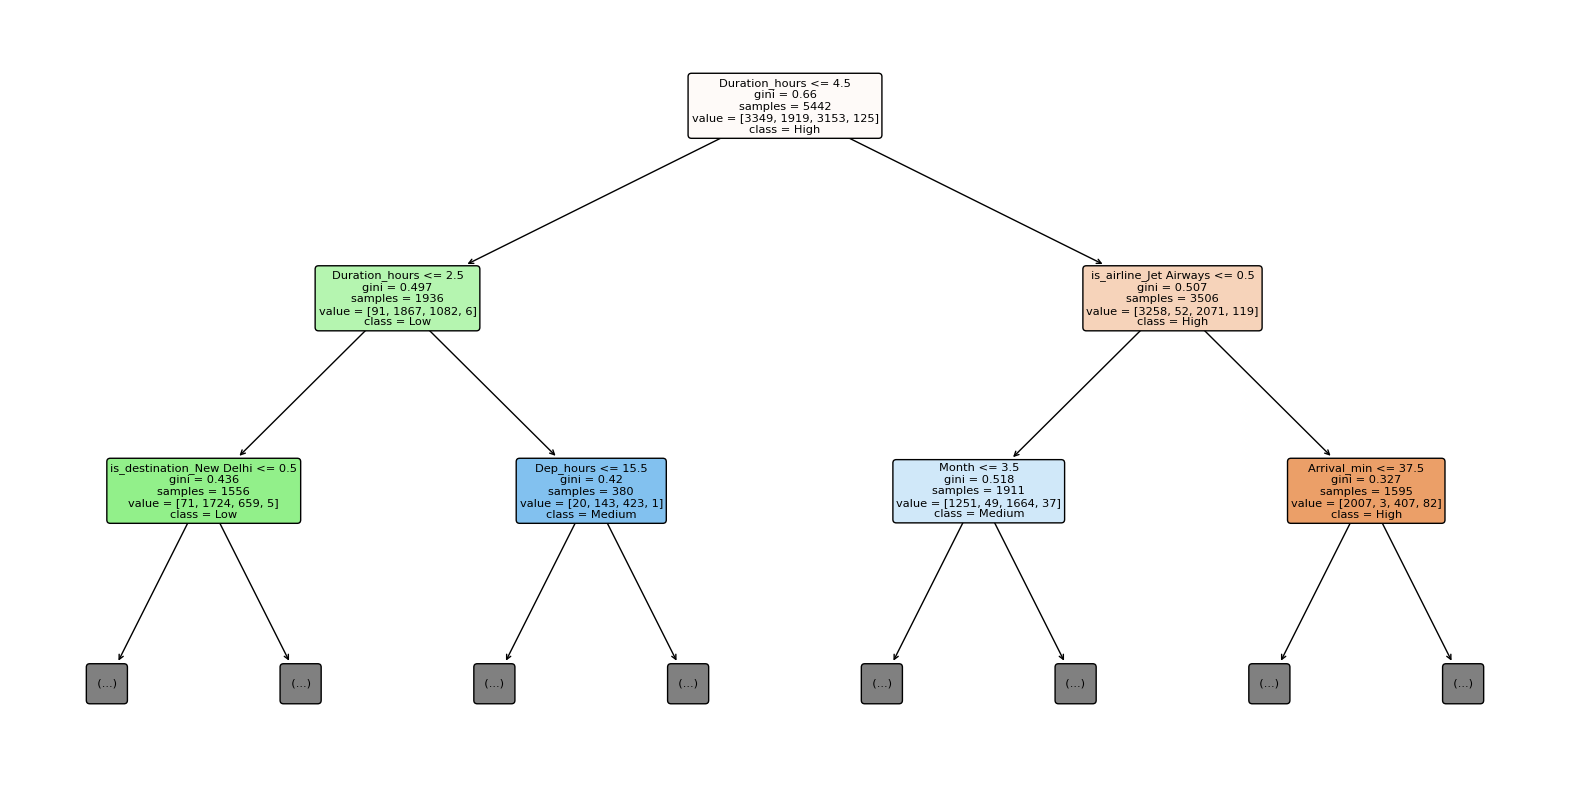

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


estimator = clf2.estimators_[0]

plt.figure(figsize=(20, 10))

plot_tree(estimator,
          feature_names=X_train.columns,
          class_names=clf2.classes_.astype(str),
          filled=True,
          rounded=True,
          max_depth=2)

plt.show()


importances diagram

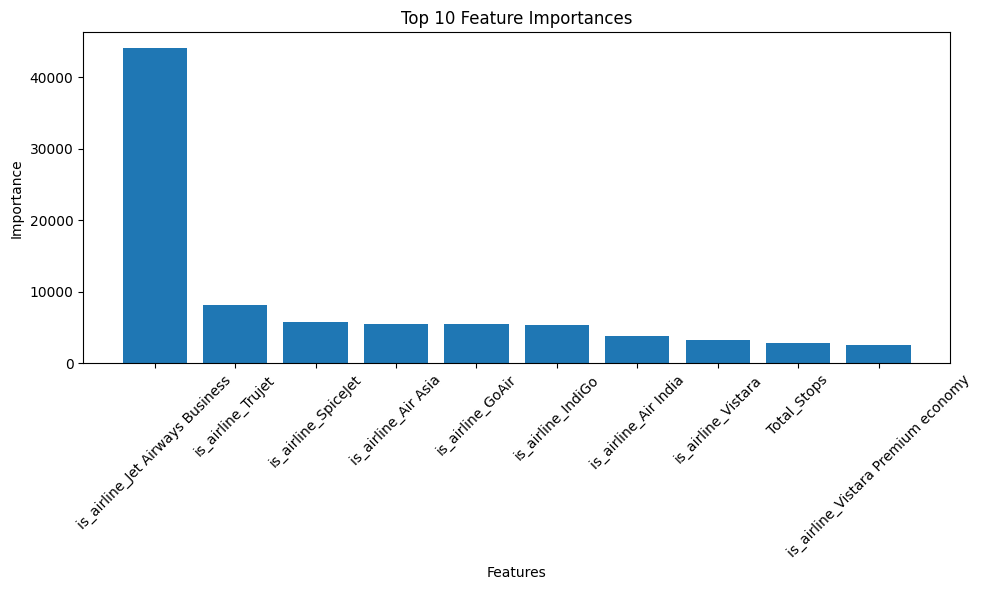

                                         feature    importance
14               is_airline_Jet Airways Business  44047.524658
18                             is_airline_Trujet   8124.665487
17                           is_airline_SpiceJet   5738.483934
9                            is_airline_Air Asia   5531.679022
11                              is_airline_GoAir   5437.472124
12                             is_airline_IndiGo   5269.873281
10                          is_airline_Air India   3767.062276
19                            is_airline_Vistara   3243.273491
0                                    Total_Stops   2786.045758
20            is_airline_Vistara Premium economy   2602.143563
15                  is_airline_Multiple carriers   1806.803845
31                      is_destination_New Delhi   1499.858948
16  is_airline_Multiple carriers Premium economy   1465.522524
28                          is_destination_Delhi   1101.683236
13                        is_airline_Jet Airways   1060

In [96]:
import matplotlib.pyplot as plt

importances = clf2.feature_importances_
feature_importance4 = pd.DataFrame({'feature': Features.columns, 'importance': importances})
feature_importance4 = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance4['feature'][:10], feature_importance4['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance4)

To evaluate the performance of your trained classifier, use the classifier to predict the test set.

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob1 = clf2.predict_proba(x_test)
accuracy_test9=metrics.accuracy_score(y_test,y_pred1)
print('Accuracy of Decision Tree-Test:',accuracy_test9)
acuuracy_train9=clf2.score(x_train,y_train)
print('Accuracy of Decision Tree-Train:',acuuracy_train9)
for i in range(len(clf2.classes_)):
    roc_auc = roc_auc_score(y_test == clf2.classes_[i], y_prob1[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf1.classes_[i]}: {roc_auc}")
    roc_auc_general= roc_auc_score(y_test, y_prob1, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")


Accuracy of Decision Tree-Test: 0.7206364061768835
Accuracy of Decision Tree-Train: 0.7307512286449801
AUC ROC of Decision Tree-Test:High: 0.9001721753004377
AUC ROC of Decision Tree-Test:Low: 0.9710742957791421
AUC ROC of Decision Tree-Test:Medium: 0.811360852523273
AUC ROC of Decision Tree-Test:Very High: 0.9193658918631648
General AUC ROC of Decision Tree-Test: 0.9004933038665044


cheack if the model suffer form overfiiting

In [98]:
if acuuracy_train9 > accuracy_test9:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

The classifier suffers from overfitting


Calculation of the gap between the training accuracy and the test accuracy

In [99]:
critical_threshold = 0.05

accuracy_difference9 = acuuracy_train9 - accuracy_test9

if accuracy_difference9 > critical_threshold:
    print(f"Warning: Significant difference between training and test accuracy . This may indicate overfitting.")
else:
    print(f"No significant difference between training and test accuracy .")


No significant difference between training and test accuracy .


**NB (Naive Bayes - בייס נאיבי)**

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

acuuracy of test and train
AUC ROC of tree test

Accuracy of Decision Tree-Test: 0.6214319138979878
Accuracy of Decision Tree-Train: 0.614205476246197
AUC ROC of Decision Tree-Test:High: 0.8434169935740736
AUC ROC of Decision Tree-Test:Low: 0.959453853910069
AUC ROC of Decision Tree-Test:Medium: 0.7625424000301513
AUC ROC of Decision Tree-Test:Very High: 0.9656023607731252
General AUC ROC of Decision Tree-Test: 0.9004933038665044


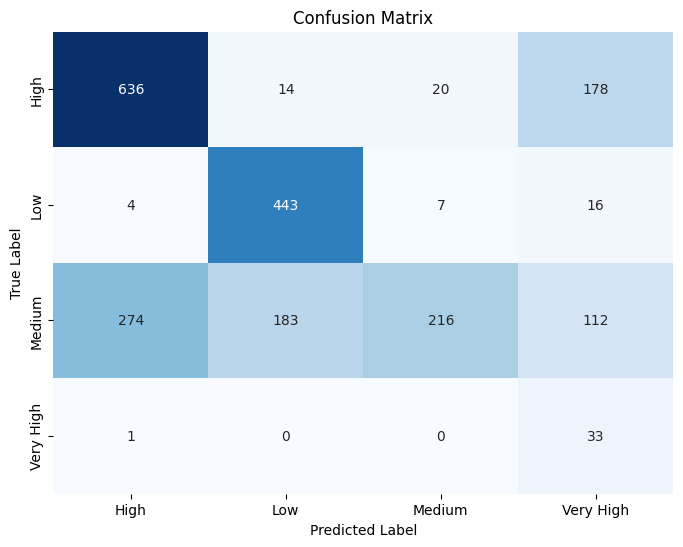

In [101]:

y_pred2=nb_model.predict(x_test)
y_prob2 = nb_model.predict_proba(x_test)
accuracy_test8=metrics.accuracy_score(y_test,y_pred2)
print('Accuracy of Decision Tree-Test:',accuracy_test8)
acuuracy_train8=nb_model.score(x_train,y_train)
print('Accuracy of Decision Tree-Train:',acuuracy_train8)
for i in range(len(nb_model.classes_)):
    roc_auc = roc_auc_score(y_test == nb_model.classes_[i], y_prob2[:, i])
    print(f"AUC ROC of Decision Tree-Test:{nb_model.classes_[i]}: {roc_auc}")
    roc_auc_general= roc_auc_score(y_test, y_prob1, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")
#matrix
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Calculation of the gap between the training accuracy and the test accuracy

In [102]:
critical_threshold = 0.05

accuracy_difference8 = acuuracy_train8 - accuracy_test8

if accuracy_difference8 > critical_threshold:
    print(f"Warning: Significant difference between training and test accuracy. This may indicate overfitting.")
else:
    print(f"No significant difference between training and test accuracy.")


No significant difference between training and test accuracy.


**XGBoost (eXtreme Gradient Boosting)**

In [103]:
import xgboost as xgb

# Normalize only the price (target variable)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(targetClass.values.reshape(-1, 1)).flatten()

# Create and train the XGBoost model
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=1)
model_xgb.fit(X_train, y_train_scaled)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [104]:
# Make predictions on the test set
y_pred_scaled3 = model_xgb.predict(x_test)
y_pred3 = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

Training Accuracy: 0.9338866550790497
Test Accuracy: 0.730289325524712
The XGBoost model might be overfitting.
Gap between Training and Test Accuracy: 0.20359732955433762


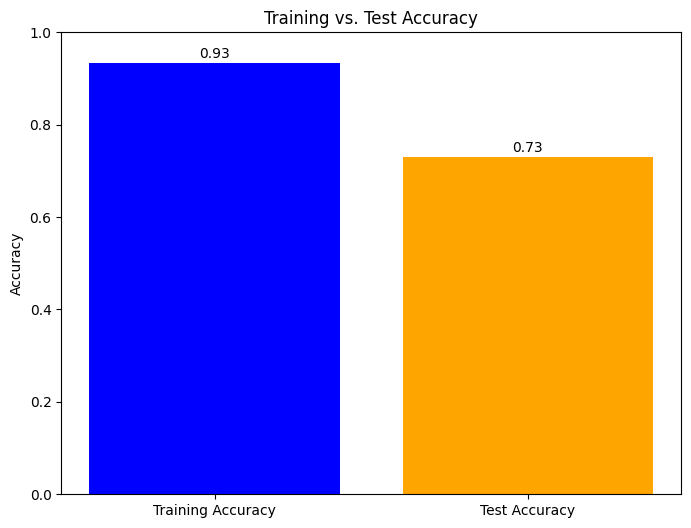

In [105]:
# Calculate training and test accuracy
acuuracy_train10 = model_xgb.score(x_train, y_train_scaled)
accuracy_test10 = r2_score(y_test_original, y_pred3)

print(f"Training Accuracy: {acuuracy_train10}")
print(f"Test Accuracy: {accuracy_test10}")

# Check for overfitting
if acuuracy_train10 > accuracy_test10:
    print("The XGBoost model might be overfitting.")
else:
    print("The XGBoost model does not seem to be overfitting.")
    # Calculate the gap between training and test accuracy
gap = abs(acuuracy_train10 - accuracy_test10)
print(f"Gap between Training and Test Accuracy: {gap}")

import matplotlib.pyplot as plt

train_accuracy = acuuracy_train10
test_accuracy = accuracy_test10

labels = ['Training Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy')

for i in range(len(labels)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')

plt.show()




The **Destination** column is selected

**Classification**

In [123]:
import pandas as pd
df1 = pd.read_csv("/content/datasets/flight-dataset/flight_dataset.csv")
df1

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,2019,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,2019,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,2019,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,2019,11,30,14,10,2,40


Removing columns:Airline,Source,Destination and creating new columns

In [124]:
airline_dummies = pd.get_dummies(df1['Airline'], prefix='is_airline', dtype=int)

source_dummies = pd.get_dummies(df1['Source'], prefix='is_source', dtype=int)
#add new cloumמs
df1 = pd.concat([df1, airline_dummies, source_dummies], axis=1)
#remove cloumns
df1 = df1.drop(['Airline', 'Source'], axis=1)



In [125]:
df1

,Destination,Total_Stops,Price,Date,Month,Year,Dep_hours,Dep_min,Arrival_hours,Arrival_min,...,is_airline_Multiple carriers Premium economy,is_airline_SpiceJet,is_airline_Trujet,is_airline_Vistara,is_airline_Vistara Premium economy,is_source_Banglore,is_source_Chennai,is_source_Delhi,is_source_Kolkata,is_source_Mumbai
0,New Delhi,0,3897,24,3,2019,22,20,1,10,...,0,0,0,0,0,1,0,0,0,0
1,Banglore,2,7662,1,5,2019,5,50,13,15,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,2,13882,9,6,2019,9,25,4,25,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,1,6218,12,5,2019,18,5,23,30,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,1,13302,1,3,2019,16,50,21,35,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Banglore,0,4107,9,4,2019,19,55,22,25,...,0,0,0,0,0,0,0,0,1,0
10679,Banglore,0,4145,27,4,2019,20,45,23,20,...,0,0,0,0,0,0,0,0,1,0
10680,Delhi,0,7229,27,4,2019,8,20,11,20,...,0,0,0,0,0,1,0,0,0,0
10681,New Delhi,0,12648,1,3,2019,11,30,14,10,...,0,0,0,1,0,1,0,0,0,0


remove the cloumn "Year"

In [126]:
df1 = df1.drop(columns='Year')
df1 = df1.dropna()

In [127]:
df1

,Destination,Total_Stops,Price,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,...,is_airline_Multiple carriers Premium economy,is_airline_SpiceJet,is_airline_Trujet,is_airline_Vistara,is_airline_Vistara Premium economy,is_source_Banglore,is_source_Chennai,is_source_Delhi,is_source_Kolkata,is_source_Mumbai
0,New Delhi,0,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,1,0,0,0,0
1,Banglore,2,7662,1,5,5,50,13,15,7,...,0,0,0,0,0,0,0,0,1,0
2,Cochin,2,13882,9,6,9,25,4,25,19,...,0,0,0,0,0,0,0,1,0,0
3,Banglore,1,6218,12,5,18,5,23,30,5,...,0,0,0,0,0,0,0,0,1,0
4,New Delhi,1,13302,1,3,16,50,21,35,4,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Banglore,0,4107,9,4,19,55,22,25,2,...,0,0,0,0,0,0,0,0,1,0
10679,Banglore,0,4145,27,4,20,45,23,20,2,...,0,0,0,0,0,0,0,0,1,0
10680,Delhi,0,7229,27,4,8,20,11,20,3,...,0,0,0,0,0,1,0,0,0,0
10681,New Delhi,0,12648,1,3,11,30,14,10,2,...,0,0,0,1,0,1,0,0,0,0


Split the data into training and testing sets

In [128]:
import numpy as np
from sklearn.model_selection import train_test_split
featureNew1=df1.drop(columns=['Destination'])
targetNew1=df1['Destination']
x_train1,x_test1,y_train1,y_test1=train_test_split(featureNew1,targetNew1,test_size=0.2,random_state=1)

In [129]:

import numpy as np
from sklearn import metrics
majority_class = y_train1.mode()[0]  # Get the mode (most frequent class)

y_pred_majority = np.full_like(y_test1, majority_class)  # Fill predictions with majority class

accuracy_majority = metrics.accuracy_score(y_test1, y_pred_majority)
print("Majority Rule Accuracy:", accuracy_majority)


Majority Rule Accuracy: 0.4258306036499766


test-traning diagram

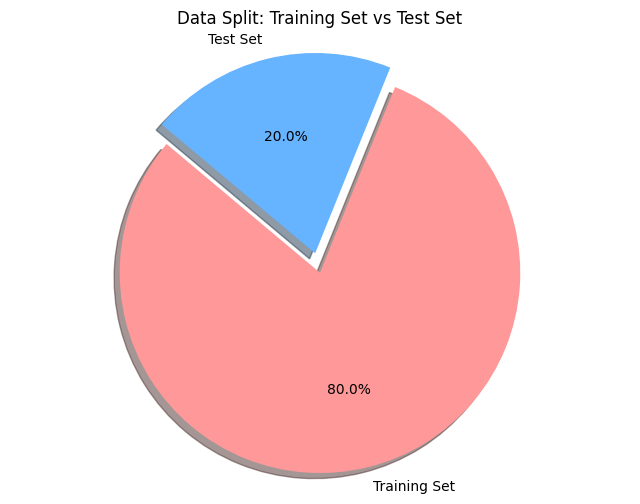

In [130]:
import matplotlib.pyplot as plt
num_train1 = len(x_train1)
num_test1 = len(x_test1)

labels = ['Training Set', 'Test Set']
sizes = [num_train1, num_test1]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Split: Training Set vs Test Set')
plt.axis('equal')
plt.show()

***DT (Decision Tree - עץ החלטה)***

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Create Decision Tree classifer object
clf4=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,random_state=1)
clf4.fit(x_train1,y_train1)
y_pred4=clf4.predict(x_test1)


tree diagram

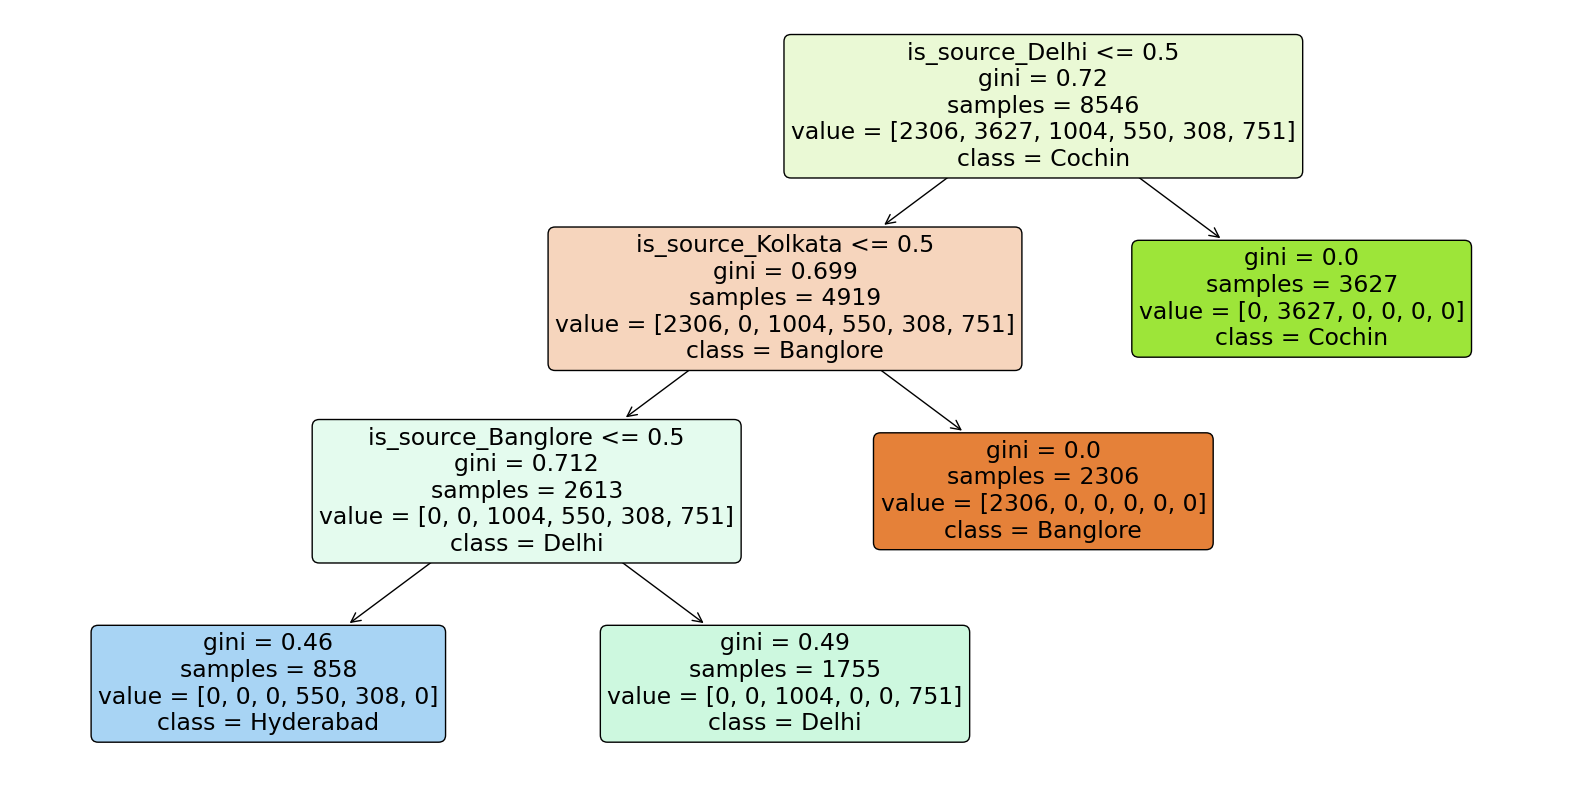

In [132]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(clf4, filled=True, feature_names=x_train1.columns, class_names=clf4.classes_,rounded=True)
plt.show()

importances diagram

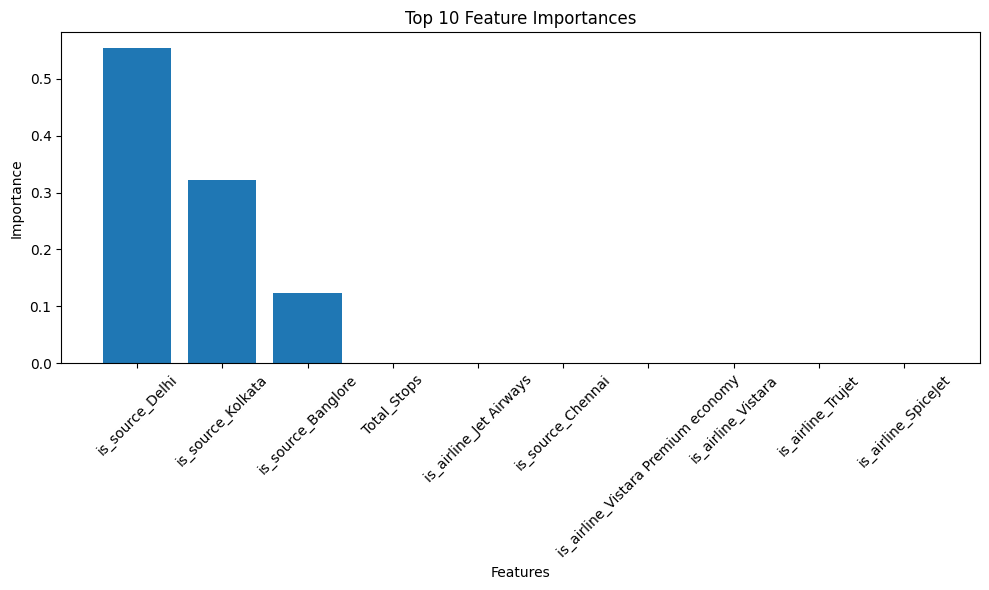

                                         feature  importance
24                               is_source_Delhi    0.554382
25                             is_source_Kolkata    0.322109
22                            is_source_Banglore    0.123510
0                                    Total_Stops    0.000000
14                        is_airline_Jet Airways    0.000000
23                             is_source_Chennai    0.000000
21            is_airline_Vistara Premium economy    0.000000
20                            is_airline_Vistara    0.000000
19                             is_airline_Trujet    0.000000
18                           is_airline_SpiceJet    0.000000
17  is_airline_Multiple carriers Premium economy    0.000000
16                  is_airline_Multiple carriers    0.000000
15               is_airline_Jet Airways Business    0.000000
13                             is_airline_IndiGo    0.000000
1                                          Price    0.000000
12                      

In [133]:
import matplotlib.pyplot as plt

importances = clf4.feature_importances_
feature_importance7 = pd.DataFrame({'feature': featureNew1.columns, 'importance': importances})
feature_importance7 = feature_importance7.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance7['feature'][:10], feature_importance7['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance7)

accuracy of test and train
calc AUC ROC of decision tree

In [134]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob4 = clf4.predict_proba(x_test1)
accuracy_test4=metrics.accuracy_score(y_test1,y_pred4)
print('Accuracy of Decision Tree-Test:',accuracy_test4)
acuuracy_train4=clf4.score(x_train1,y_train1)
print('Accuracy of Decision Tree-Train:',acuuracy_train4)
for i in range(len(clf4.classes_)):
    roc_auc4 = roc_auc_score(y_test1 == clf4.classes_[i], y_prob4[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf4.classes_[i]}: {roc_auc4}")
    roc_auc_general= roc_auc_score(y_test1, y_prob4, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")


Accuracy of Decision Tree-Test: 0.8811417875526439
Accuracy of Decision Tree-Train: 0.8760823777205711
AUC ROC of Decision Tree-Test:Banglore: 1.0
AUC ROC of Decision Tree-Test:Cochin: 1.0
AUC ROC of Decision Tree-Test:Delhi: 0.9517590618336886
AUC ROC of Decision Tree-Test:Hyderabad: 0.9816582914572864
AUC ROC of Decision Tree-Test:Kolkata: 0.9643895348837209
AUC ROC of Decision Tree-Test:New Delhi: 0.933282208588957
General AUC ROC of Decision Tree-Test: 0.9718481827939421


In [135]:
if acuuracy_train4>accuracy_test4:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

The classifier does not suffers from overfitting


Calculation of the gap between the training accuracy and the test accuracy

In [136]:
critical_threshold = 0.05

accuracy_difference4 = acuuracy_train4 - accuracy_test4

if accuracy_difference4 > critical_threshold:
    print(f"Warning: Significant difference between training and test accuracy ({accuracy_difference}). This may indicate overfitting.")
else:
    print(f"No significant difference between training and test accuracy ({accuracy_difference4 }).")


No significant difference between training and test accuracy (-0.00505940983207287).


**SVM**

In [137]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

clf6 = SVC(random_state=42)

# Train the model
clf6.fit(x_train1, y_train1)
y_pred6 = clf6.predict(x_test1)
accuracy_test6=metrics.accuracy_score(y_test1,y_pred6)
print('Accuracy of Test:',accuracy_test6)
acuuracy_train6=clf6.score(x_train1,y_train1)
print('Accuracy of Train:',acuuracy_train6)

# Perform cross-validation
cv_scores = cross_val_score(clf6, featureNew1, targetNew1, cv=5)

# Check for overfitting
if acuuracy_train6 > accuracy_test6:
    print("Warning: Model might be overfitting.")
else:
    print("Model does not show signs of overfitting.")
    # Calculate the gap between training and test accuracy
gap = abs(acuuracy_train6 - accuracy_test6)
print(f"Gap between Training and Test Accuracy: {gap}")

Accuracy of Test: 0.5292466073935423
Accuracy of Train: 0.5181371401825415
Model does not show signs of overfitting.
Gap between Training and Test Accuracy: 0.011109467211000812


diagram

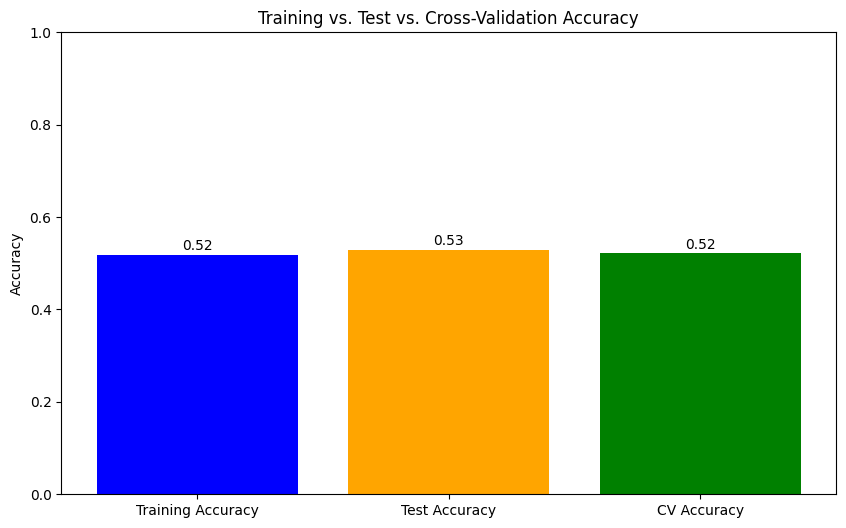

In [121]:
import matplotlib.pyplot as plt

train_accuracy12 = acuuracy_train6
test_accuracy12 = accuracy_test6
cv_mean_accuracy = np.mean(cv_scores)
cv_std_accuracy = np.std(cv_scores)

labels = ['Training Accuracy', 'Test Accuracy', 'CV Accuracy']
accuracies = [train_accuracy12, test_accuracy12, cv_mean_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  #
plt.ylabel('Accuracy')
plt.title('Training vs. Test vs. Cross-Validation Accuracy')

for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')


plt.show()


importances diagram

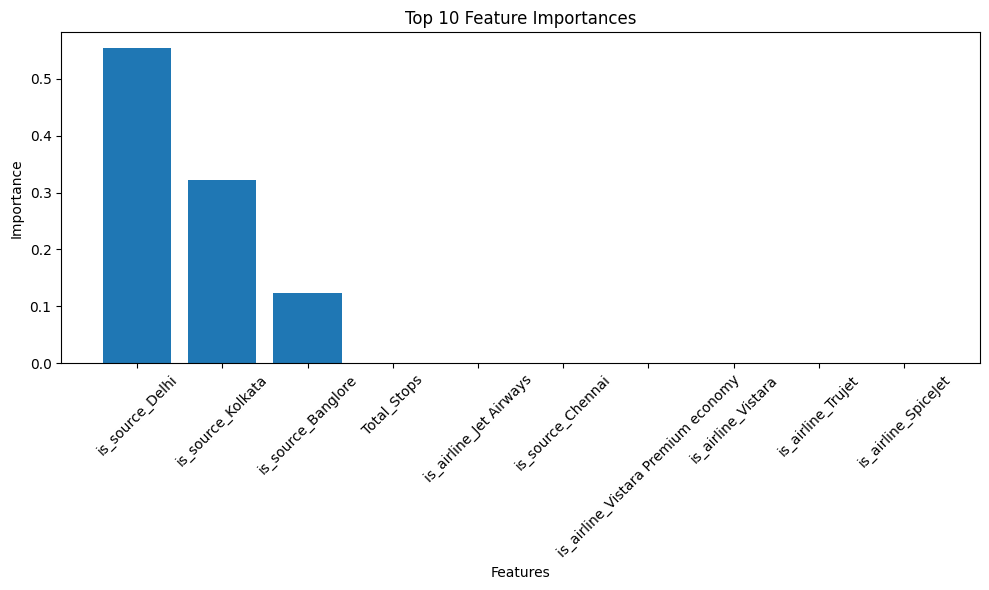

                                         feature  importance
24                               is_source_Delhi    0.554382
25                             is_source_Kolkata    0.322109
22                            is_source_Banglore    0.123510
0                                    Total_Stops    0.000000
14                        is_airline_Jet Airways    0.000000
23                             is_source_Chennai    0.000000
21            is_airline_Vistara Premium economy    0.000000
20                            is_airline_Vistara    0.000000
19                             is_airline_Trujet    0.000000
18                           is_airline_SpiceJet    0.000000
17  is_airline_Multiple carriers Premium economy    0.000000
16                  is_airline_Multiple carriers    0.000000
15               is_airline_Jet Airways Business    0.000000
13                             is_airline_IndiGo    0.000000
1                                          Price    0.000000
12                      

In [138]:
import matplotlib.pyplot as plt

feature_importance6 = pd.DataFrame({'feature': featureNew1.columns, 'importance': importances})
feature_importance6 = feature_importance6.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance6['feature'][:10], feature_importance6['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance6)



---



**10-fold**

The **Price** column is selected

**LinearRegression**

**regression**



**Without normalization**

LinearRegression with 10-fold cross-validation:
Mean MSE: 8064621.160163879, Standard Deviation: 925972.8824599821
Mean R2: 0.6188971553570112, Standard Deviation: 0.03674375316474662


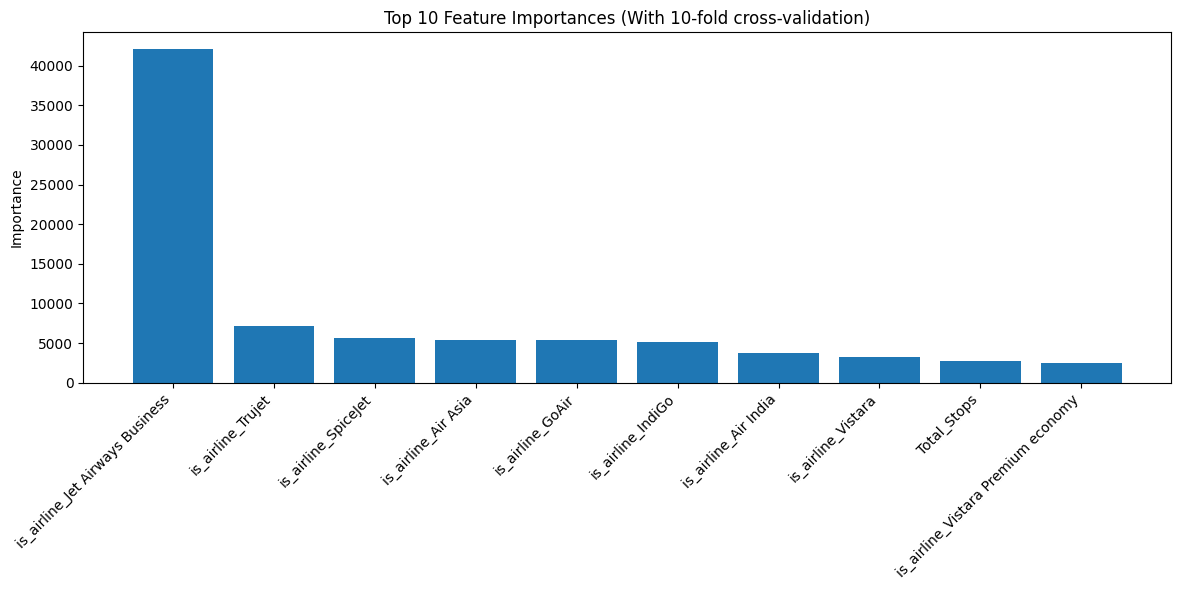

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined

print("LinearRegression with 10-fold cross-validation:")

# Create the model
model_1 = LinearRegression()

# Create 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store the results
mse_list = []
r2_list = []
coef_list = []

# Perform cross-validation
for train_index, test_index in kf.split(Features):
    X_train, X_test = Features.iloc[train_index], Features.iloc[test_index]
    y_train, y_test = targetClass.iloc[train_index], targetClass.iloc[test_index]

    # Train the model
    model_1.fit(X_train, y_train)

    # Make predictions
    y_pred = model_1.predict(X_test)

    # Evaluate the model
    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))
    coef_list.append(abs(model_1.coef_))

# Calculate the mean and standard deviation for MSE and R2
mean_mse = np.mean(mse_list)
mean_r2 = np.mean(r2_list)
std_mse = np.std(mse_list)
std_r2 = np.std(r2_list)

print(f"Mean MSE: {mean_mse}, Standard Deviation: {std_mse}")
print(f"Mean R2: {mean_r2}, Standard Deviation: {std_r2}")

# Calculate the mean feature importance across all folds
mean_coef = np.mean(coef_list, axis=0)
feature_importance = pd.DataFrame({'feature': Features.columns, 'importance': mean_coef})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances (With 10-fold cross-validation)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()





**With normalization**



LinearRegression with price normalization and 10-fold cross-validation:
Mean MSE on original scale: 8064621.1601638775, Standard Deviation: 925972.8824599828
Mean R2 on original scale: 0.6188971553570113, Standard Deviation: 0.0367437531647466


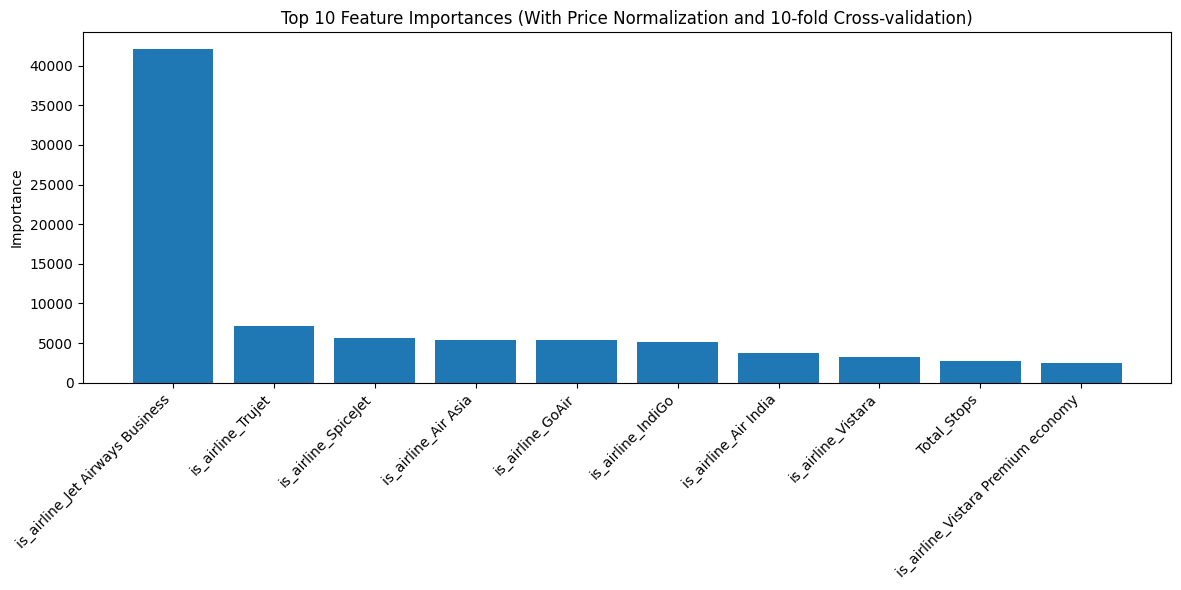

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined

print("LinearRegression with price normalization and 10-fold cross-validation:")

# Normalize only the price (target variable)
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(targetClass.values.reshape(-1, 1)).flatten()

# Create the model
model_normalized = LinearRegression()

# Create 10-fold cross-validation
kf1 = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store the results
mse_scaled_list1 = []
r2_scaled_list1 = []
mse_original_list1 = []
r2_original_list1 = []
coef_list1 = []

# Perform cross-validation
for train_index, test_index in kf1.split(Features):
    X_train, X_test = Features.iloc[train_index], Features.iloc[test_index]
    y_train_scaled, y_test_scaled = y_scaled[train_index], y_scaled[test_index]

    # Train the model
    model_normalized.fit(X_train, y_train_scaled)

    # Make predictions on scaled data
    y_pred_scaled = model_normalized.predict(X_test)

    # Evaluate the model on scaled data
    mse_scaled_list1.append(mean_squared_error(y_test_scaled, y_pred_scaled)) # Use mse_scaled_list1
    r2_scaled_list1.append(r2_score(y_test_scaled, y_pred_scaled)) # Use r2_scaled_list1

    # Transform predictions and test data back to original scale
    y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

    # Evaluate the model on original scale
    mse_original_list1.append(mean_squared_error(y_test_original, y_pred_original)) # Use mse_original_list1
    r2_original_list1.append(r2_score(y_test_original, y_pred_original)) # Use r2_original_list1

    # Store coefficients
    coef_list1.append(abs(model_normalized.coef_))

# Calculate the mean and standard deviation for MSE and R2 on both scaled and original data
mean_mse_scaled = np.mean(mse_scaled_list1) # Use mse_scaled_list1
mean_r2_scaled = np.mean(r2_scaled_list1) # Use r2_scaled_list1
std_mse_scaled = np.std(mse_scaled_list1) # Use mse_scaled_list1
std_r2_scaled = np.std(r2_scaled_list1) # Use r2_scaled_list1

mean_mse_original = np.mean(mse_original_list1) # Use mse_original_list1
mean_r2_original = np.mean(r2_original_list1) # Use r2_original_list1
std_mse_original = np.std(mse_original_list1) # Use mse_original_list1
std_r2_original = np.std(r2_original_list1) # Use r2_original_list1



print(f"Mean MSE on original scale: {mean_mse_original}, Standard Deviation: {std_mse_original}")
print(f"Mean R2 on original scale: {mean_r2_original}, Standard Deviation: {std_r2_original}")
# Calculate the mean feature importance across all folds
mean_coef = np.mean(coef_list, axis=0)
feature_importance_normalized = pd.DataFrame({'feature': Features.columns, 'importance': mean_coef})
feature_importance_normalized = feature_importance_normalized.sort_values('importance', ascending=False)

# Visualize feature importance for normalized model
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_normalized['feature'][:10], feature_importance_normalized['importance'][:10])
plt.title('Top 10 Feature Importances (With Price Normalization and 10-fold Cross-validation)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




**DecisionTreeRegressor**

**Without normalization**


DecisionTreeRegressor with 10-Fold Cross-Validation:
Mean Squared Error (MSE): 6066080.573850118
R-squared (R2): 0.7145252438562415


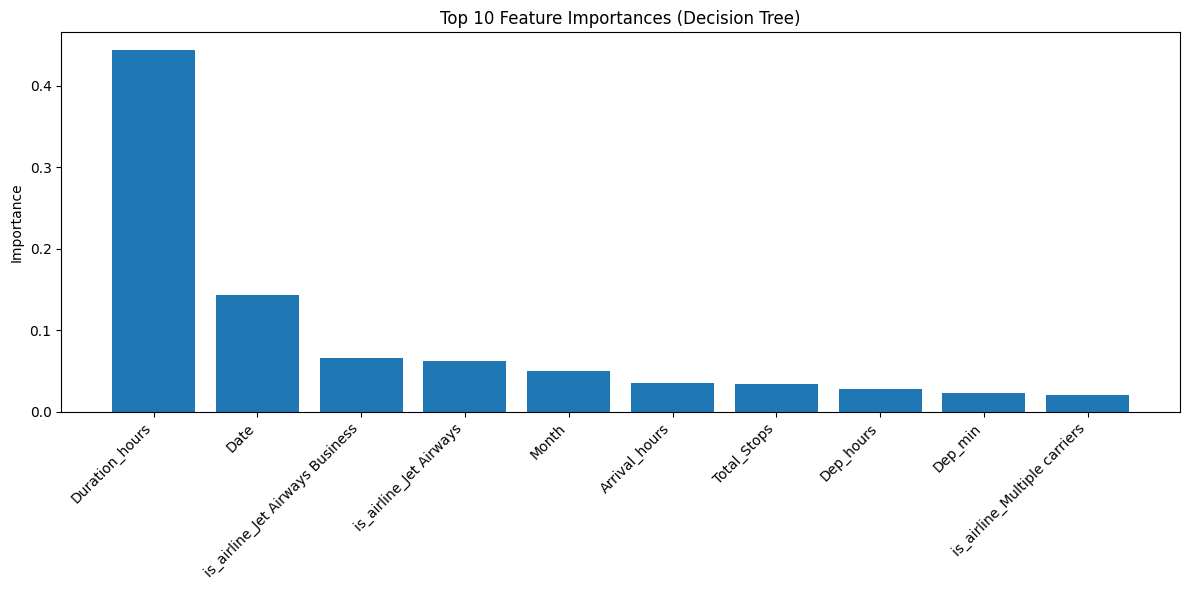

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined

print("DecisionTreeRegressor with 10-Fold Cross-Validation:")

# Initialize KFold
kf2 = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store evaluation metrics
mse_list = []
r2_list = []

# Lists to accumulate feature importances
feature_importances = np.zeros(Features.shape[1])

# Perform K-Fold Cross-Validation
for train_index, test_index in kf2.split(Features):
    x_train_kf, x_test_kf = Features.iloc[train_index], Features.iloc[test_index]
    y_train_kf, y_test_kf = targetClass.iloc[train_index], targetClass.iloc[test_index]

    # Create and train the decision tree model
    model = DecisionTreeRegressor(random_state=1)
    model.fit(x_train_kf, y_train_kf)

    # Make predictions
    y_pred_kf = model.predict(x_test_kf)

    # Evaluate the model
    mse = mean_squared_error(y_test_kf, y_pred_kf)
    r2 = r2_score(y_test_kf, y_pred_kf)

    mse_list.append(mse)
    r2_list.append(r2)

    # Accumulate feature importances
    feature_importances += model.feature_importances_

# Calculate average MSE and R²
mean_mse = np.mean(mse_list)
mean_r2 = np.mean(r2_list)

print(f"Mean Squared Error (MSE): {mean_mse}")
print(f"R-squared (R2): {mean_r2}")

# Average feature importance
feature_importance_avg = feature_importances / kf.get_n_splits()

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({'feature': Features.columns, 'importance': feature_importance_avg})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**With normalization**


DecisionTreeRegressor with 10-Fold Cross-Validation and price normalization:
Mean Squared Error (MSE) on original scale: 5822368.4103631945
R-squared (R2) on original scale: 0.7261691102866306


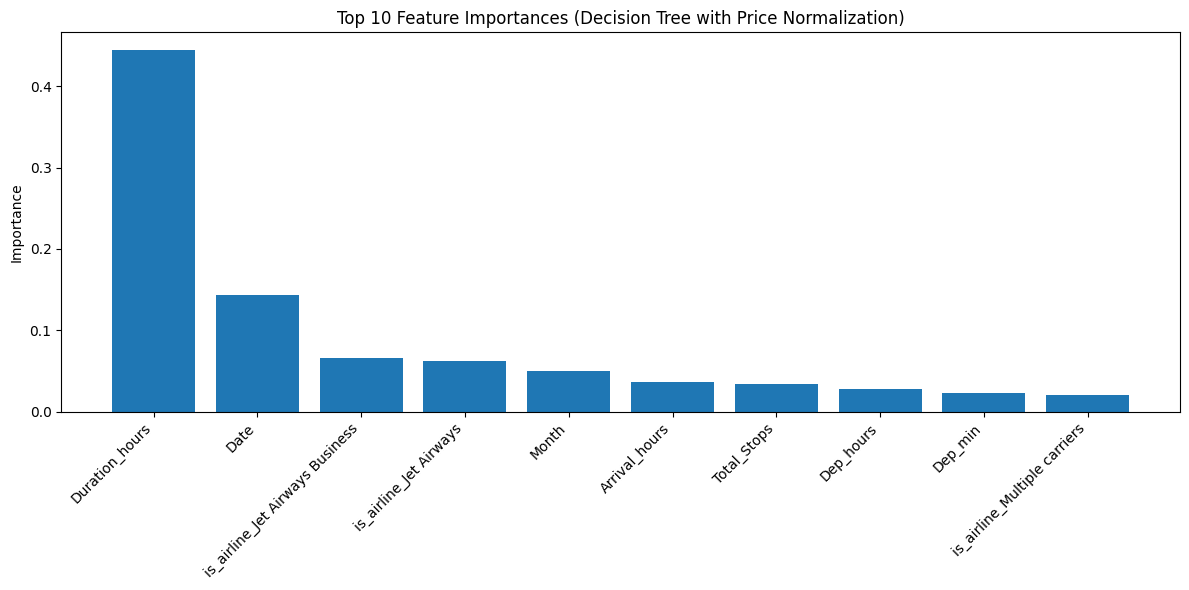

In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming Features and targetClass are already defined
print("DecisionTreeRegressor with 10-Fold Cross-Validation and price normalization:")

# Initialize KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store evaluation metrics
mse_list_scaled = []
r2_list_scaled = []

# Lists to accumulate feature importances
feature_importances = np.zeros(Features.shape[1])

# Lists to store predictions and actual values for original scale
y_test_all_original = []
y_pred_all_original = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(Features):
    X_train_kf, X_test_kf = Features.iloc[train_index], Features.iloc[test_index]
    y_train_kf, y_test_kf = targetClass.iloc[train_index], targetClass.iloc[test_index]

    # Normalize the target variable
    scaler_y = StandardScaler()
    y_train_kf_scaled = scaler_y.fit_transform(y_train_kf.values.reshape(-1, 1)).flatten()
    y_test_kf_scaled = scaler_y.transform(y_test_kf.values.reshape(-1, 1)).flatten()

    # Create and train the decision tree model
    model = DecisionTreeRegressor(random_state=1)
    model.fit(X_train_kf, y_train_kf_scaled)

    # Make predictions
    y_pred_kf_scaled = model.predict(X_test_kf)

    # Evaluate the model on scaled data
    mse_scaled = mean_squared_error(y_test_kf_scaled, y_pred_kf_scaled)
    r2_scaled = r2_score(y_test_kf_scaled, y_pred_kf_scaled)

    mse_list_scaled.append(mse_scaled)
    r2_list_scaled.append(r2_scaled)

    # Transform predictions and test data back to original scale
    y_pred_original = scaler_y.inverse_transform(y_pred_kf_scaled.reshape(-1, 1)).flatten()
    y_test_original = scaler_y.inverse_transform(y_test_kf_scaled.reshape(-1, 1)).flatten()

    y_test_all_original.extend(y_test_original)
    y_pred_all_original.extend(y_pred_original)

    # Accumulate feature importances
    feature_importances += model.feature_importances_

# Evaluate the model on original scale
mse_original = mean_squared_error(y_test_all_original, y_pred_all_original)
r2_original = r2_score(y_test_all_original, y_pred_all_original)

print(f"Mean Squared Error (MSE) on original scale: {mse_original}")
print(f"R-squared (R2) on original scale: {r2_original}")

# Average feature importance
feature_importance_avg = feature_importances / kf.get_n_splits()

# Create DataFrame for feature importances
feature_importance_df = pd.DataFrame({'feature': Features.columns, 'importance': feature_importance_avg})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.title('Top 10 Feature Importances (Decision Tree with Price Normalization)')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**calssification**

In [143]:
df

,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,is_airline_Air Asia,...,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi,Price Category
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,Low
1,2,1,5,5,50,13,15,7,25,0,...,0,1,0,1,0,0,0,0,0,Medium
2,2,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,High
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,1,0,0,0,0,0,Medium
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,1,...,0,1,0,1,0,0,0,0,0,Low
10679,0,27,4,20,45,23,20,2,35,0,...,0,1,0,1,0,0,0,0,0,Low
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,1,0,0,0,Medium
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,High


In [144]:
# Define feature and target variables
featureNew = df.drop(columns=['Price Category'])
targetNew = df['Price Category']

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store evaluation metrics
accuracy_list = []
classification_reports = []
roc_auc_scores = np.zeros((len(targetNew.unique()), kf.get_n_splits()))  # For each class and fold

# Lists to accumulate feature importances
feature_importances = np.zeros(featureNew.shape[1])

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(featureNew):
    X_train_kf, X_test_kf = featureNew.iloc[train_index], featureNew.iloc[test_index]
    y_train_kf, y_test_kf = targetNew.iloc[train_index], targetNew.iloc[test_index]

    # Normalize features
    scaler_X = StandardScaler()
    X_train_kf_scaled = scaler_X.fit_transform(X_train_kf)
    X_test_kf_scaled = scaler_X.transform(X_test_kf)

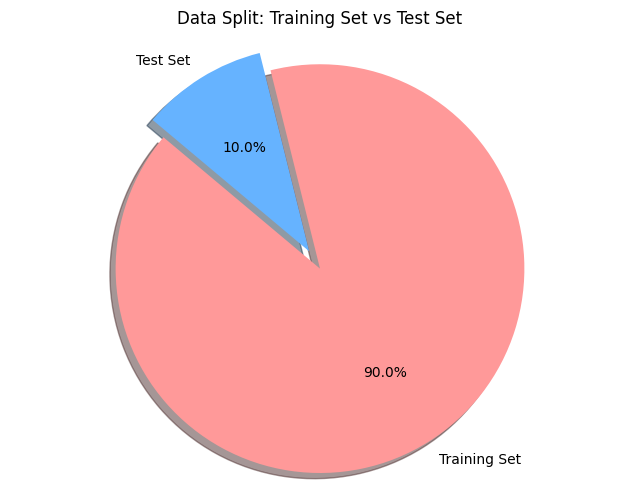

In [146]:
import matplotlib.pyplot as plt
num_train = len(X_train_kf)
num_test = len(X_test_kf)

labels = ['Training Set', 'Test Set']
sizes = [num_train, num_test]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Split: Training Set vs Test Set')
plt.axis('equal')
plt.show()

***DT (Decision Tree - עץ החלטה)***

In [147]:
 clf9 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)
 clf9.fit(X_train_kf, y_train_kf)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

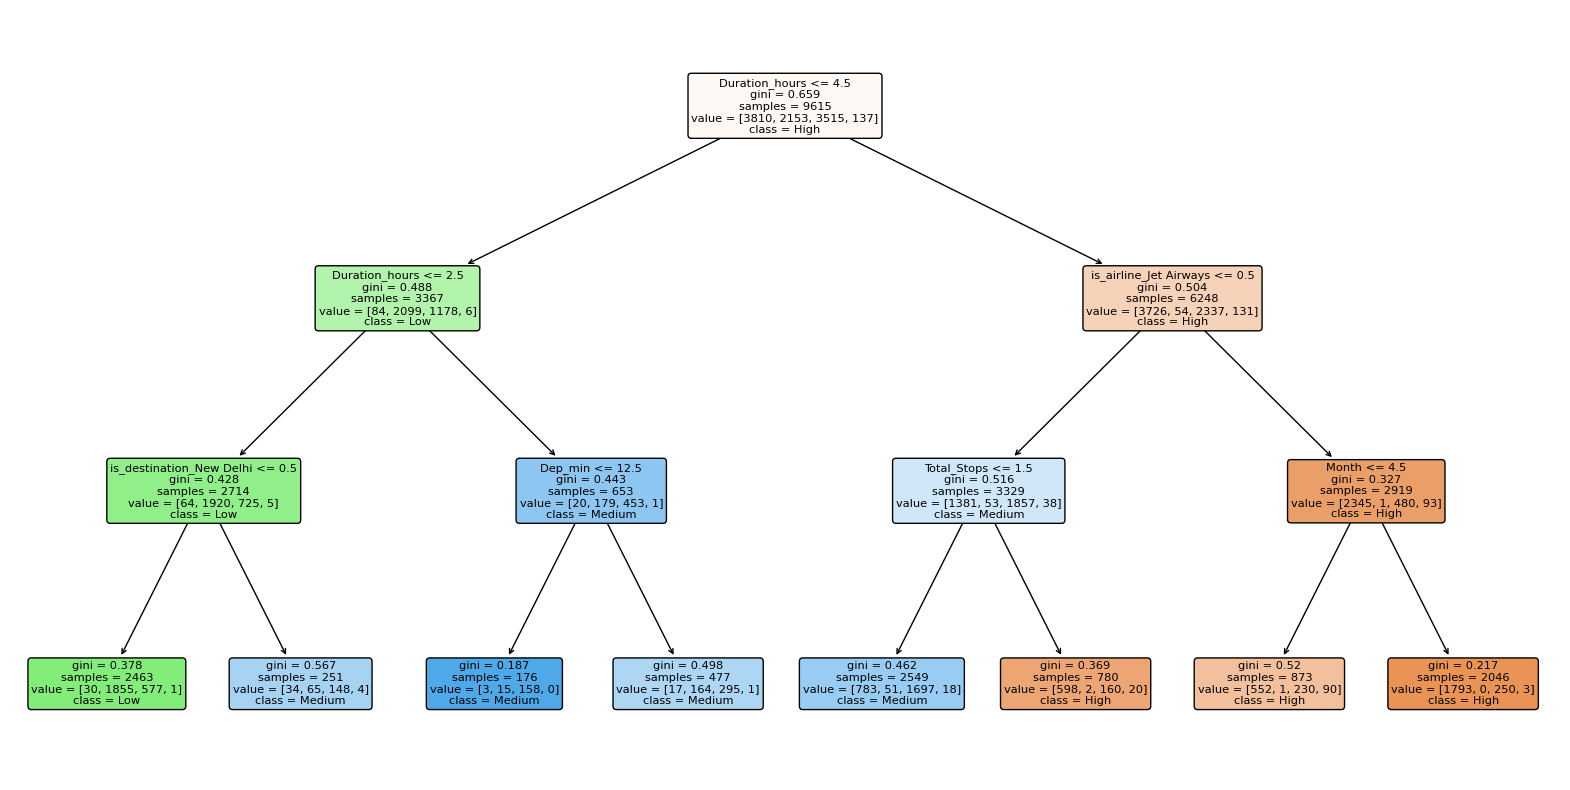

In [148]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class names to strings
class_names_str = [str(c) for c in clf9.classes_]

plt.figure(figsize=(20, 10))
plot_tree(clf9, filled=True, feature_names=X_train_kf.columns,
          class_names=class_names_str, rounded=True) # Use string class names
plt.show()

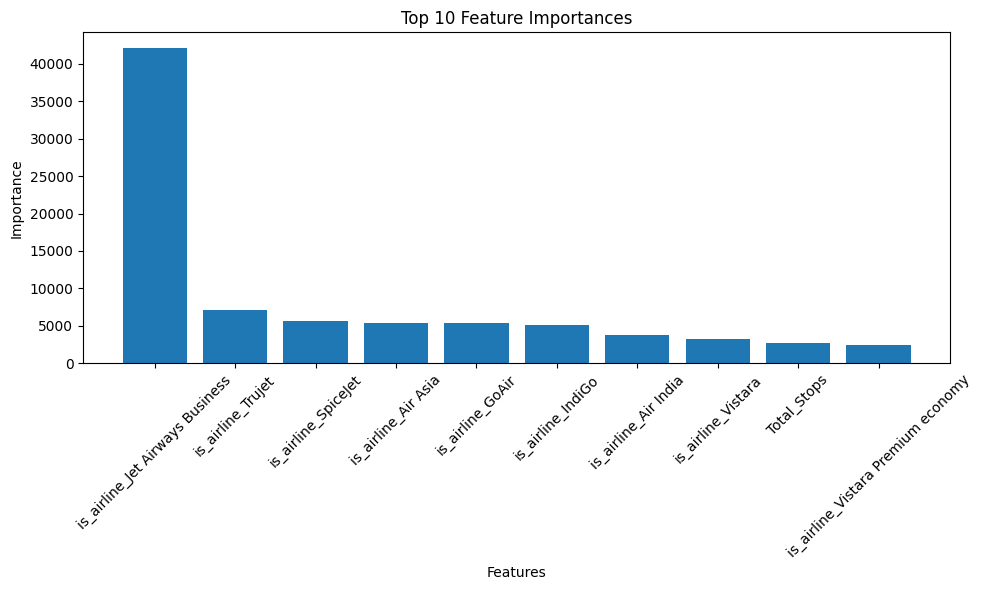

                                         feature    importance
14               is_airline_Jet Airways Business  42107.121288
18                             is_airline_Trujet   7150.326886
17                           is_airline_SpiceJet   5659.297993
9                            is_airline_Air Asia   5390.459368
11                              is_airline_GoAir   5341.553989
12                             is_airline_IndiGo   5145.298336
10                          is_airline_Air India   3758.091019
19                            is_airline_Vistara   3227.449144
0                                    Total_Stops   2739.353866
20            is_airline_Vistara Premium economy   2484.784867
15                  is_airline_Multiple carriers   1679.967854
31                      is_destination_New Delhi   1542.182339
16  is_airline_Multiple carriers Premium economy   1249.627034
28                          is_destination_Delhi   1112.007635
13                        is_airline_Jet Airways   1020

In [149]:
import matplotlib.pyplot as plt

importances20 = clf9.feature_importances_
feature_importance20 = pd.DataFrame({'feature': Features.columns, 'importance': importances20})
feature_importance20 = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance20['feature'][:10], feature_importance20['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance20)

In [150]:

# Calculate majority class in training set
majority_class = y_train_kf.mode()[0]

# Predict majority class for all test instances
y_pred_majority = np.full_like(y_test_kf, majority_class)

# Calculate accuracy of majority rule classifier
majority_rule_accuracy = accuracy_score(y_test_kf, y_pred_majority)

print(f"Majority Rule Accuracy: {majority_rule_accuracy}")


Majority Rule Accuracy: 0.3857677902621723


In [151]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

y_pred9 = clf9.predict(X_test_kf)
accuracy_test9=metrics.accuracy_score(y_test_kf,y_pred9)
print('Accuracy of Decision Tree-Test:',accuracy_test9)

# Reshape y_test_kf to be a 2D array
acuuracy_train9=clf9.score(X_test_kf, y_test_kf.values.reshape(-1, 1))
print('Accuracy of Decision Tree-Train:',acuuracy_train9)

# Predict probabilities for Decision Tree
y_prob9 = clf9.predict_proba(X_test_kf)  # Calculate probabilities for the current model
for i in range(len(clf9.classes_)):
    roc_auc9 = roc_auc_score(y_test_kf == clf9.classes_[i], y_prob9[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf9.classes_[i]}: {roc_auc9}")
    roc_auc_general= roc_auc_score(y_test_kf, y_prob9, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")



Accuracy of Decision Tree-Test: 0.7556179775280899
Accuracy of Decision Tree-Train: 0.7556179775280899
AUC ROC of Decision Tree-Test:High: 0.9022762254321572
AUC ROC of Decision Tree-Test:Low: 0.9462514855488764
AUC ROC of Decision Tree-Test:Medium: 0.787630315757894
AUC ROC of Decision Tree-Test:Very High: 0.8700438634213468
General AUC ROC of Decision Tree-Test: 0.8765504725400686


In [152]:
if acuuracy_train9>accuracy_test9:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

The classifier does not suffers from overfitting


***RF (Random Forest - יער אקראי)***

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
clf11 = RandomForestClassifier(n_estimators=100, max_depth=3,min_samples_leaf=10,random_state=1)
clf11.fit(X_train_kf, y_train_kf)
y_pred11=clf11.predict(X_test_kf)

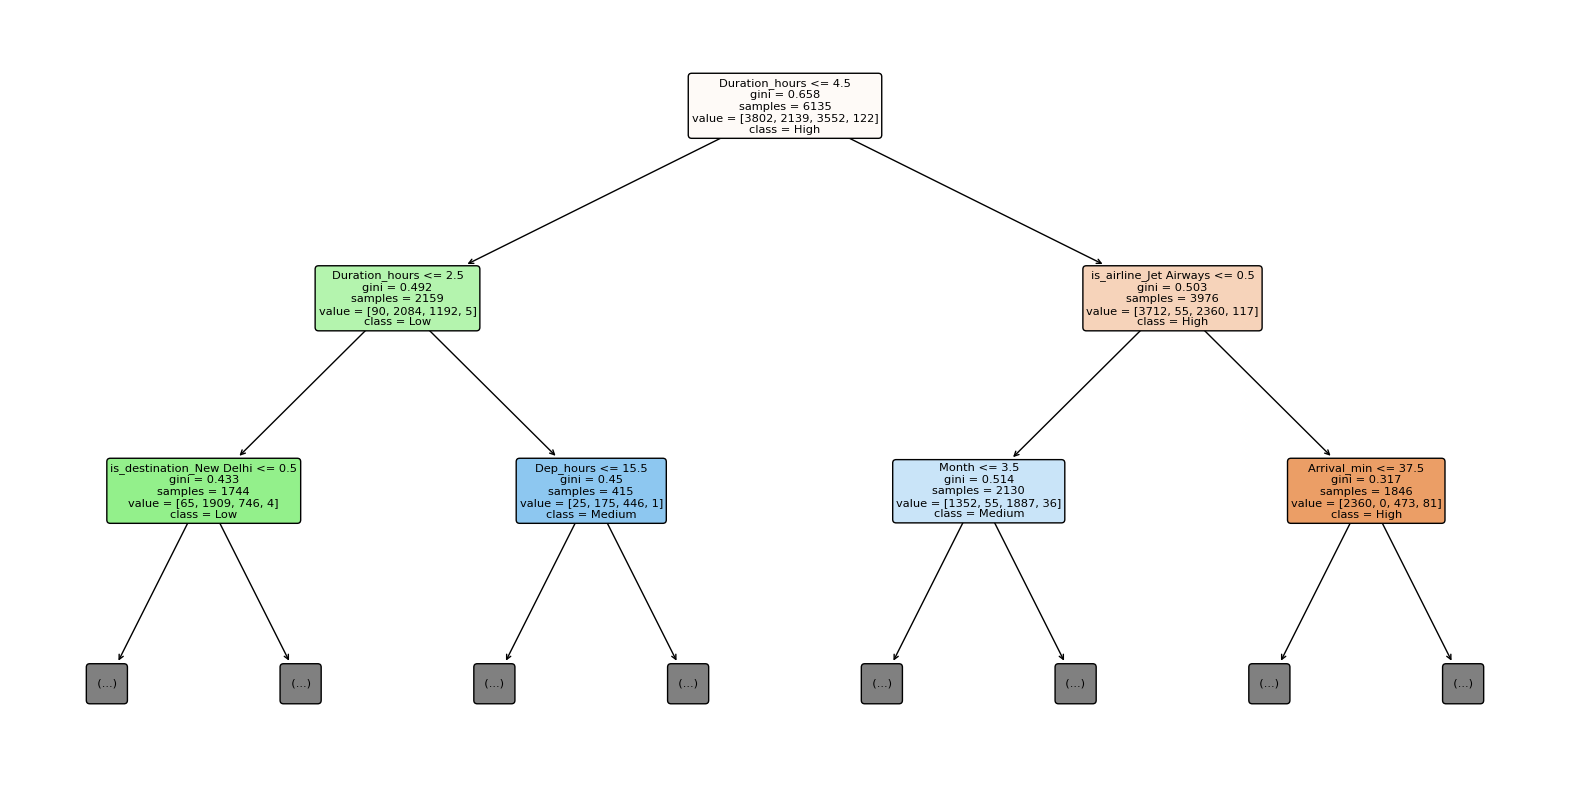

In [154]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


estimator = clf11.estimators_[0]

plt.figure(figsize=(20, 10))

plot_tree(estimator,
          feature_names=X_train_kf.columns,
          class_names=clf11.classes_.astype(str),
          filled=True,
          rounded=True,
          max_depth=2)

plt.show()


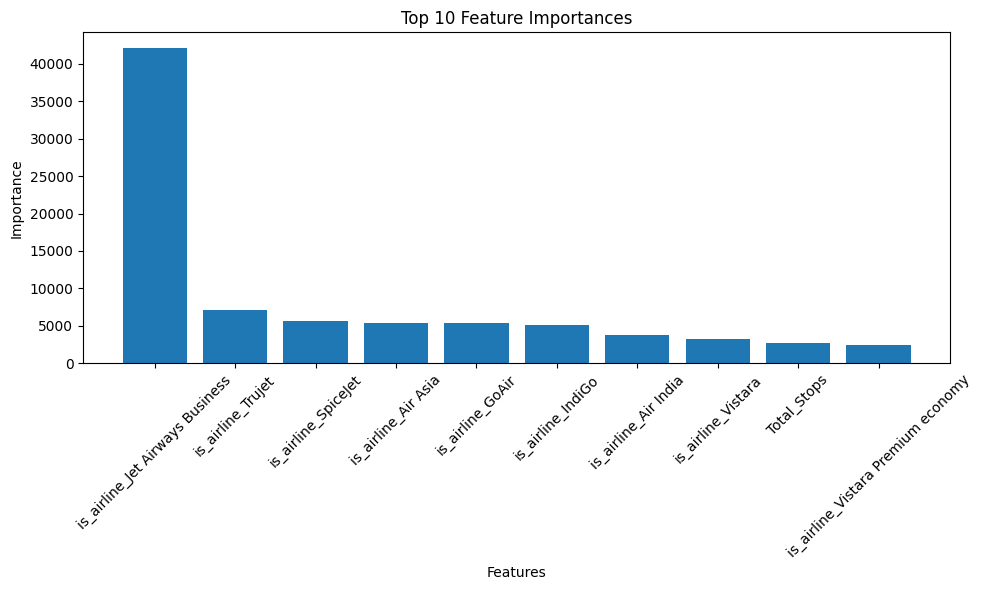

                                         feature    importance
14               is_airline_Jet Airways Business  42107.121288
18                             is_airline_Trujet   7150.326886
17                           is_airline_SpiceJet   5659.297993
9                            is_airline_Air Asia   5390.459368
11                              is_airline_GoAir   5341.553989
12                             is_airline_IndiGo   5145.298336
10                          is_airline_Air India   3758.091019
19                            is_airline_Vistara   3227.449144
0                                    Total_Stops   2739.353866
20            is_airline_Vistara Premium economy   2484.784867
15                  is_airline_Multiple carriers   1679.967854
31                      is_destination_New Delhi   1542.182339
16  is_airline_Multiple carriers Premium economy   1249.627034
28                          is_destination_Delhi   1112.007635
13                        is_airline_Jet Airways   1020

In [155]:
import matplotlib.pyplot as plt

importances = clf11.feature_importances_
feature_importance11 = pd.DataFrame({'feature': Features.columns, 'importance': importances})
feature_importance11= feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance11['feature'][:10], feature_importance11['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance11)

To evaluate the performance of your trained classifier, use the classifier to predict the test set.

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob11 = clf11.predict_proba(X_test_kf)
y_pred11 = clf11.predict(X_test_kf)
accuracy_test11=metrics.accuracy_score(y_test_kf,y_pred11)
print('Accuracy of Decision Tree-Test:',accuracy_test11)
acuuracy_train11=clf2.score(X_train_kf,y_train_kf)
print('Accuracy of Decision Tree-Train:',acuuracy_train11)
for i in range(len(clf9.classes_)):
    roc_auc11 = roc_auc_score(y_test_kf == clf11.classes_[i], y_prob11[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf11.classes_[i]}: {roc_auc11}")
    roc_auc_general= roc_auc_score(y_test_kf, y_prob11, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")


Accuracy of Decision Tree-Test: 0.7359550561797753
Accuracy of Decision Tree-Train: 0.7277171086843474
AUC ROC of Decision Tree-Test:High: 0.9128859075301918
AUC ROC of Decision Tree-Test:Low: 0.9672192990674945
AUC ROC of Decision Tree-Test:Medium: 0.8274994374859371
AUC ROC of Decision Tree-Test:Very High: 0.8623892663627764
General AUC ROC of Decision Tree-Test: 0.8924984776116001


In [157]:
if acuuracy_train9 > accuracy_test9:
    print("The classifier suffers from overfitting")
else:
    print("The classifier does not suffer from overfitting")

The classifier does not suffer from overfitting


**NB (Naive Bayes - בייס נאיבי)**

In [158]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb_model1 = GaussianNB()
nb_model1.fit(x_train_kf, y_train_kf)


GaussianNB()

Accuracy of Decision Tree-Test: 0.6226591760299626
Accuracy of Decision Tree-Train: 0.6134165366614664
AUC ROC of Decision Tree-Test:High: 0.8486395187070802
AUC ROC of Decision Tree-Test:Low: 0.9533229447647039
AUC ROC of Decision Tree-Test:Medium: 0.7793388584714618
AUC ROC of Decision Tree-Test:Very High: 0.9620710415412401
General AUC ROC of Decision Tree-Test: 0.8858430908711216


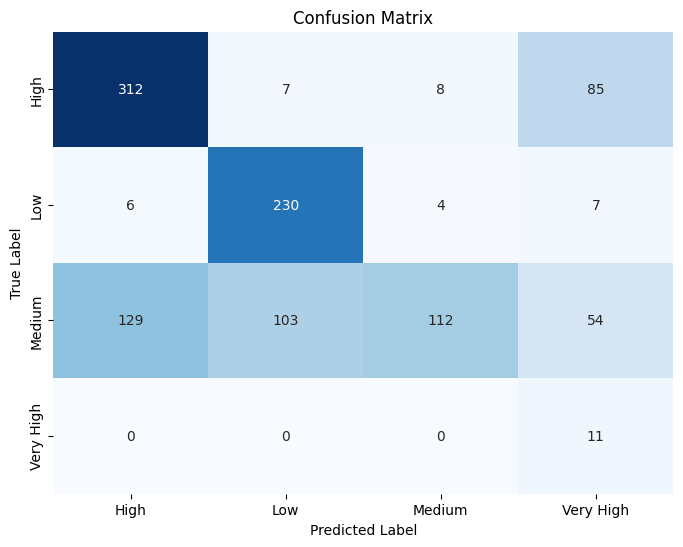

In [159]:
y_pred12=nb_model1.predict(X_test_kf)
y_prob12 = nb_model1.predict_proba(X_test_kf)

accuracy_test12=metrics.accuracy_score(y_test_kf,y_pred12)
print('Accuracy of Decision Tree-Test:',accuracy_test12)
acuuracy_train12=nb_model1.score(X_train_kf,y_train_kf)
print('Accuracy of Decision Tree-Train:',acuuracy_train12)

for i in range(len(nb_model1.classes_)):
    roc_auc = roc_auc_score(y_test_kf == nb_model1.classes_[i], y_prob12[:, i])
    print(f"AUC ROC of Decision Tree-Test:{nb_model1.classes_[i]}: {roc_auc}")
    roc_auc_general= roc_auc_score(y_test_kf, y_prob12, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")
#matrix
cm = confusion_matrix(y_test_kf, y_pred12)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=clf1.classes_, yticklabels=clf1.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



In [160]:
# Check for overfitting
if acuuracy_train12 > accuracy_test12:
    print("The model might be overfitting.")
else:
    print("The model does not seem to be overfitting.")


The model does not seem to be overfitting.



The **Destination** column is selected

**Classification**

Split the data into training and testing sets

In [161]:
# Assume df2 is the DataFrame with 'Destination' as the target variable
featureNew2 = df1.drop(columns=['Destination'])
targetNew2 = df1['Destination']

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store evaluation metrics
accuracy_list = []
classification_reports = []
roc_auc_scores = np.zeros((len(targetNew2.unique()), kf.get_n_splits()))  # For each class and fold
# Lists to accumulate feature importances
feature_importances = np.zeros(featureNew2.shape[1])

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(featureNew2):
    X_train_kf1, X_test_kf1 = featureNew2.iloc[train_index], featureNew2.iloc[test_index]
    y_train_kf1, y_test_kf1 = targetNew2.iloc[train_index], targetNew2.iloc[test_index]

    # Normalize features
    scaler_X1 = StandardScaler()
    X_train_kf_scaled1 = scaler_X1.fit_transform(X_train_kf1)
    X_test_kf_scaled1 = scaler_X1.transform(X_test_kf1)


In [162]:

import numpy as np
from sklearn import metrics
majority_class = y_train_kf1.mode()[0]  # Get the mode (most frequent class)

y_pred_majority = np.full_like(y_test_kf1, majority_class)  # Fill predictions with majority class

accuracy_majority = metrics.accuracy_score(y_test_kf1, y_pred_majority)
print("Majority Rule Accuracy:", accuracy_majority)

Majority Rule Accuracy: 0.4250936329588015


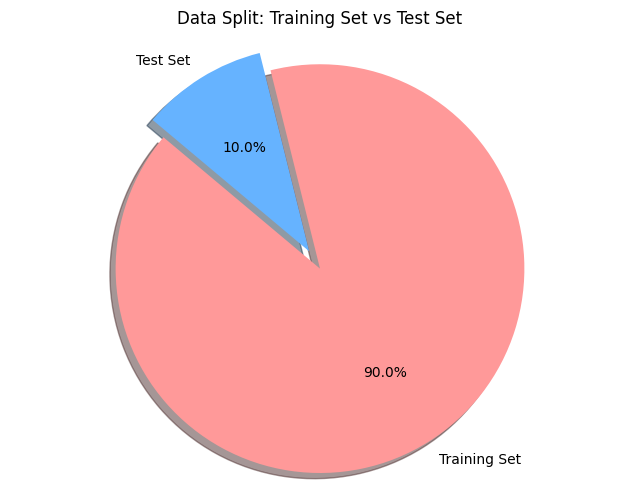

In [163]:
import matplotlib.pyplot as plt
num_train1 = len(X_train_kf1)
num_test1 = len(X_test_kf1)

labels = ['Training Set', 'Test Set']
sizes = [num_train1, num_test1]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Data Split: Training Set vs Test Set')
plt.axis('equal')
plt.show()

***DT (Decision Tree - עץ החלטה)***

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Create Decision Tree classifer object
clf14=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,random_state=1)
clf14.fit(X_train_kf1,y_train_kf1)
y_pred14=clf14.predict(X_test_kf1)


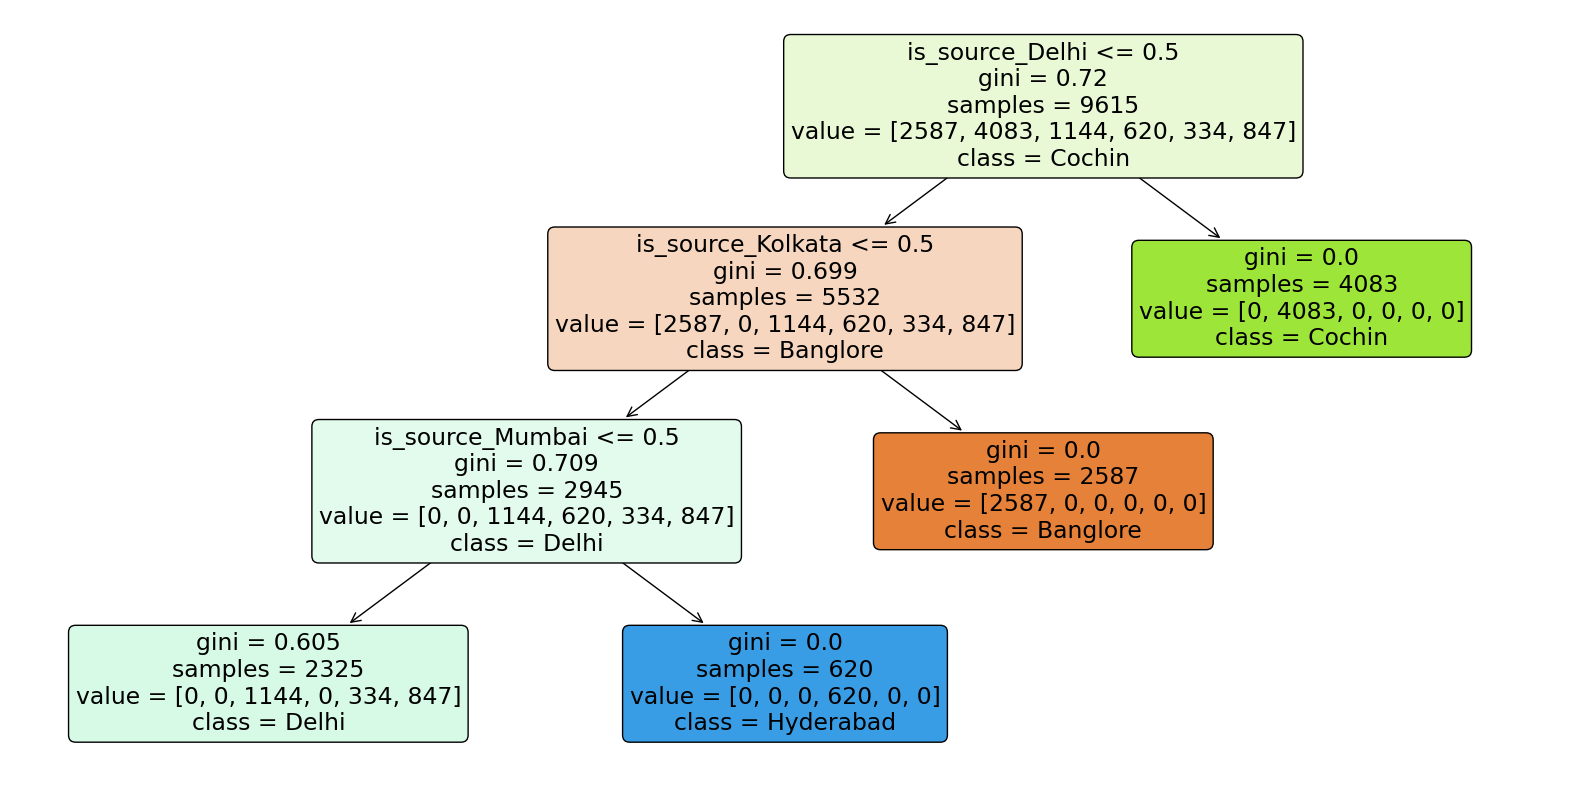

In [165]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(clf14, filled=True, feature_names=X_train_kf1.columns, class_names=clf14.classes_,rounded=True)
plt.show()

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob14 = clf14.predict_proba(X_test_kf1)
y_pred14 = clf14.predict(X_test_kf1)
accuracy_test14=metrics.accuracy_score(y_test_kf1,y_pred14)
print('Accuracy of Decision Tree-Test:',accuracy_test14)
acuuracy_train14=clf4.score(x_train1,y_train1)
print('Accuracy of Decision Tree-Train:',acuuracy_train14)
for i in range(len(clf4.classes_)):
    roc_auc14 = roc_auc_score(y_test_kf1 == clf14.classes_[i], y_prob14[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf14.classes_[i]}: {roc_auc14}")
    roc_auc_general= roc_auc_score(y_test_kf1, y_prob14, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")

Accuracy of Decision Tree-Test: 0.8764044943820225
Accuracy of Decision Tree-Train: 0.8760823777205711
AUC ROC of Decision Tree-Test:Banglore: 1.0
AUC ROC of Decision Tree-Test:Cochin: 1.0
AUC ROC of Decision Tree-Test:Delhi: 0.9303062302006335
AUC ROC of Decision Tree-Test:Hyderabad: 1.0
AUC ROC of Decision Tree-Test:Kolkata: 0.8991185112634672
AUC ROC of Decision Tree-Test:New Delhi: 0.9145473041709055
General AUC ROC of Decision Tree-Test: 0.9573286742725009


In [167]:
if acuuracy_train14>accuracy_test14:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

The classifier does not suffers from overfitting


**SVM**

In [168]:

import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


clf16 = SVC(random_state=42)

# Train the model
clf16.fit(X_train_kf1, y_train_kf1)
y_pred16 = clf6.predict(X_test_kf1)
accuracy_test16=metrics.accuracy_score(y_test_kf1,y_pred16)
print('Accuracy of Decision Tree-Test:',accuracy_test16)
acuuracy_train16=clf16.score(X_train_kf1,y_train_kf1)
print('Accuracy of Decision Tree-Train:',acuuracy_train16)

# Perform cross-validation
cv_scores = cross_val_score(clf16, featureNew1, targetNew1, cv=5)


# Check for overfitting
if acuuracy_train16 > accuracy_test16:
    print("Model might be overfitting.")
else:
    print("Model does not show signs of overfitting.")
    gap = abs(acuuracy_train16 - accuracy_test16)
print(f"Gap between Training and Test Accuracy: {gap}")

Accuracy of Decision Tree-Test: 0.5121722846441947
Accuracy of Decision Tree-Train: 0.5217888715548622
Model might be overfitting.
Gap between Training and Test Accuracy: 0.011109467211000812


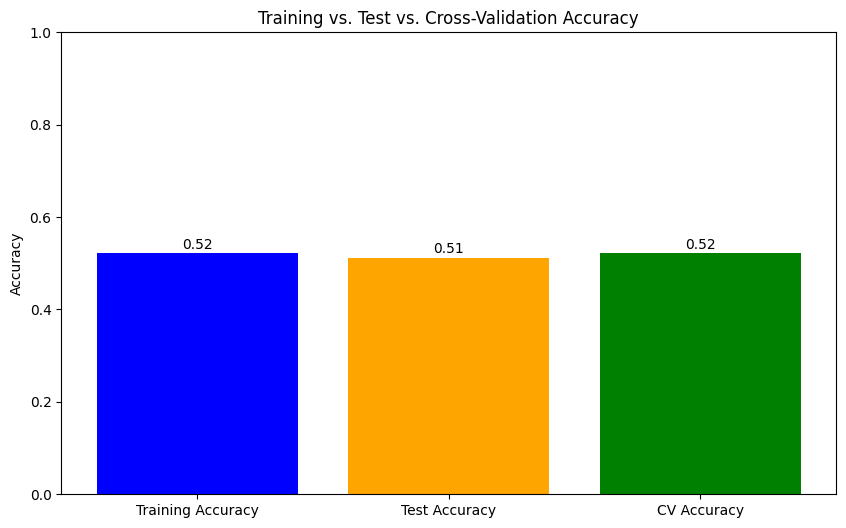

In [169]:

import matplotlib.pyplot as plt

train_accuracy17 = acuuracy_train16
test_accuracy17 = accuracy_test16
cv_mean_accuracy = np.mean(cv_scores)
cv_std_accuracy = np.std(cv_scores)

labels = ['Training Accuracy', 'Test Accuracy', 'CV Accuracy']
accuracies = [train_accuracy17, test_accuracy17, cv_mean_accuracy]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.ylim(0, 1)  #
plt.ylabel('Accuracy')
plt.title('Training vs. Test vs. Cross-Validation Accuracy')

for i in range(len(accuracies)):
    plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center')


plt.show()



---



Converting the values ​​rules in the table to numbers and checking whether this affects the results of the classifier

**Test-training **

In [170]:
df

,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,is_airline_Air Asia,...,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi,Price Category
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,1,Low
1,2,1,5,5,50,13,15,7,25,0,...,0,1,0,1,0,0,0,0,0,Medium
2,2,9,6,9,25,4,25,19,0,0,...,1,0,0,0,1,0,0,0,0,High
3,1,12,5,18,5,23,30,5,25,0,...,0,1,0,1,0,0,0,0,0,Medium
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,1,...,0,1,0,1,0,0,0,0,0,Low
10679,0,27,4,20,45,23,20,2,35,0,...,0,1,0,1,0,0,0,0,0,Low
10680,0,27,4,8,20,11,20,3,0,0,...,0,0,0,0,0,1,0,0,0,Medium
10681,0,1,3,11,30,14,10,2,40,0,...,0,0,0,0,0,0,0,0,1,High



Making the values ​​rules be between 0 and 1

In [171]:
columns_to_normalize = ['Date', 'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours', 'Duration_min']

for col in columns_to_normalize:
    df[f'{col}_normalized'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    df[col] = df[f'{col}_normalized']
    df.drop(columns=[f'{col}_normalized'], inplace=True)

df

,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,is_airline_Air Asia,...,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi,Price Category
0,0,0.884615,3,22,0.363636,0.043478,0.181818,0.021739,0.909091,0,...,0,0,0,0,0,0,0,0,1,Low
1,2,0.000000,5,5,0.909091,0.565217,0.272727,0.130435,0.454545,0,...,0,1,0,1,0,0,0,0,0,Medium
2,2,0.307692,6,9,0.454545,0.173913,0.454545,0.391304,0.000000,0,...,1,0,0,0,1,0,0,0,0,High
3,1,0.423077,5,18,0.090909,1.000000,0.545455,0.086957,0.454545,0,...,0,1,0,1,0,0,0,0,0,Medium
4,1,0.000000,3,16,0.909091,0.913043,0.636364,0.065217,0.818182,0,...,0,0,0,0,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0.307692,4,19,1.000000,0.956522,0.454545,0.021739,0.545455,1,...,0,1,0,1,0,0,0,0,0,Low
10679,0,1.000000,4,20,0.818182,1.000000,0.363636,0.021739,0.636364,0,...,0,1,0,1,0,0,0,0,0,Low
10680,0,1.000000,4,8,0.363636,0.478261,0.363636,0.043478,0.000000,0,...,0,0,0,0,0,1,0,0,0,Medium
10681,0,0.000000,3,11,0.545455,0.608696,0.181818,0.021739,0.727273,0,...,0,0,0,0,0,0,0,0,1,High


Split the data into training and testing sets

In [172]:
featureNew=df.drop(columns=['Price Category'])
targetNew=df['Price Category']
x_train,x_test,y_train,y_test=train_test_split(featureNew,targetNew,test_size=0.2,random_state=1)

In [174]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics


# Create Decision Tree classifer object
clf13=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10,random_state=1)
clf13.fit(x_train,y_train)
y_pred=clf1.predict(x_test)


In [175]:
df

,Total_Stops,Date,Month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_min,is_airline_Air Asia,...,is_source_Delhi,is_source_Kolkata,is_source_Mumbai,is_destination_Banglore,is_destination_Cochin,is_destination_Delhi,is_destination_Hyderabad,is_destination_Kolkata,is_destination_New Delhi,Price Category
0,0,0.884615,3,22,0.363636,0.043478,0.181818,0.021739,0.909091,0,...,0,0,0,0,0,0,0,0,1,Low
1,2,0.000000,5,5,0.909091,0.565217,0.272727,0.130435,0.454545,0,...,0,1,0,1,0,0,0,0,0,Medium
2,2,0.307692,6,9,0.454545,0.173913,0.454545,0.391304,0.000000,0,...,1,0,0,0,1,0,0,0,0,High
3,1,0.423077,5,18,0.090909,1.000000,0.545455,0.086957,0.454545,0,...,0,1,0,1,0,0,0,0,0,Medium
4,1,0.000000,3,16,0.909091,0.913043,0.636364,0.065217,0.818182,0,...,0,0,0,0,0,0,0,0,1,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0.307692,4,19,1.000000,0.956522,0.454545,0.021739,0.545455,1,...,0,1,0,1,0,0,0,0,0,Low
10679,0,1.000000,4,20,0.818182,1.000000,0.363636,0.021739,0.636364,0,...,0,1,0,1,0,0,0,0,0,Low
10680,0,1.000000,4,8,0.363636,0.478261,0.363636,0.043478,0.000000,0,...,0,0,0,0,0,1,0,0,0,Medium
10681,0,0.000000,3,11,0.545455,0.608696,0.181818,0.021739,0.727273,0,...,0,0,0,0,0,0,0,0,1,High


tree decision diagram

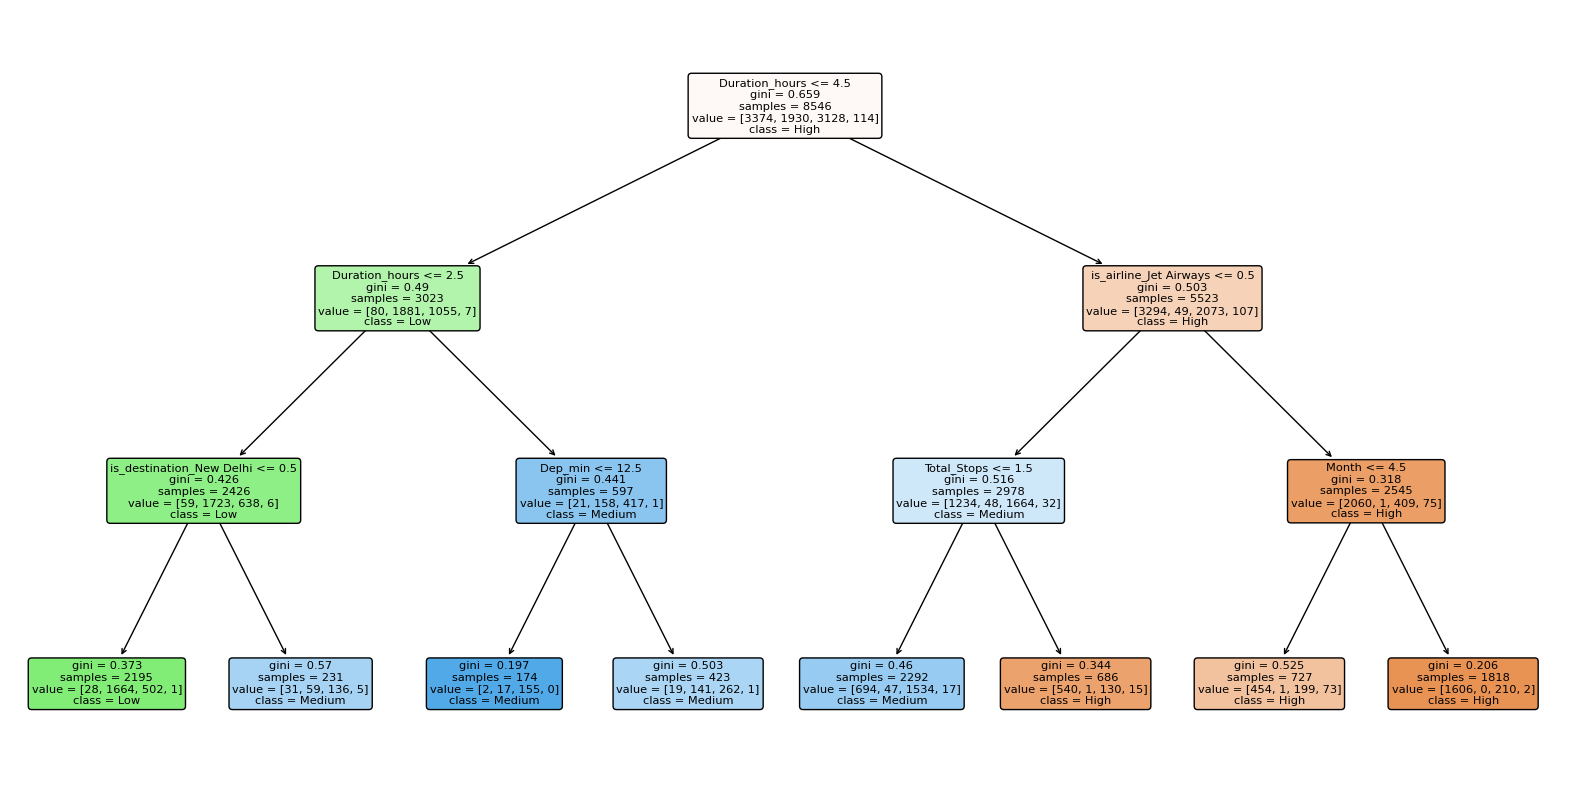

In [176]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plot_tree(clf1, filled=True, feature_names=x_train.columns, class_names=clf1.classes_,rounded=True)
plt.show()

importances diagram

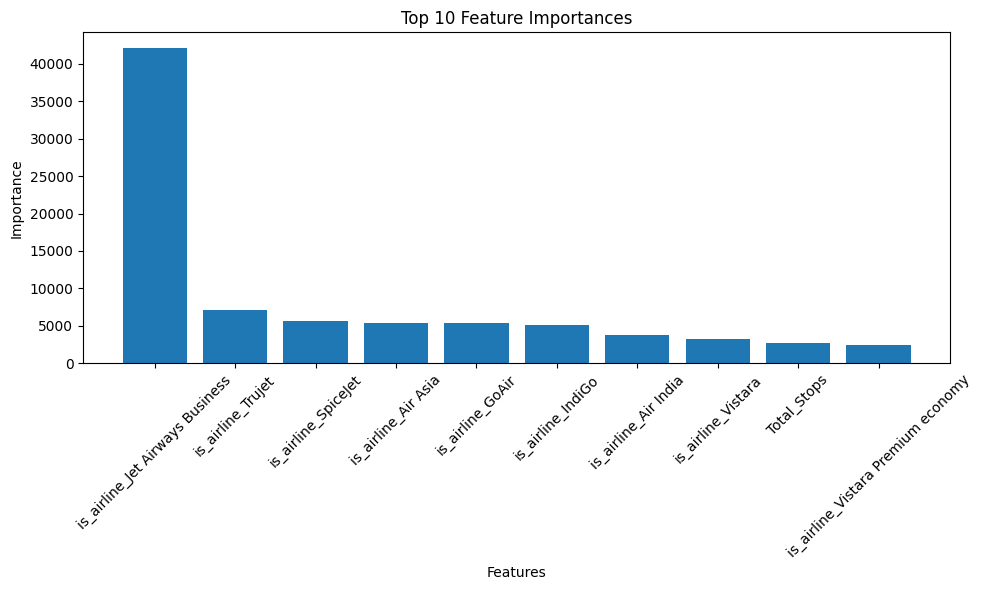

                                         feature    importance
14               is_airline_Jet Airways Business  42107.121288
18                             is_airline_Trujet   7150.326886
17                           is_airline_SpiceJet   5659.297993
9                            is_airline_Air Asia   5390.459368
11                              is_airline_GoAir   5341.553989
12                             is_airline_IndiGo   5145.298336
10                          is_airline_Air India   3758.091019
19                            is_airline_Vistara   3227.449144
0                                    Total_Stops   2739.353866
20            is_airline_Vistara Premium economy   2484.784867
15                  is_airline_Multiple carriers   1679.967854
31                      is_destination_New Delhi   1542.182339
16  is_airline_Multiple carriers Premium economy   1249.627034
28                          is_destination_Delhi   1112.007635
13                        is_airline_Jet Airways   1020

In [177]:
import matplotlib.pyplot as plt

importances12 = clf13.feature_importances_
feature_importance12 = pd.DataFrame({'feature': Features.columns, 'importance': importances})
feature_importance12 = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance3['feature'][:10], feature_importance12['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance12)

calc accuracy of test and train and AUC ROC

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob12 = clf13.predict_proba(x_test)
accuracy_test1=metrics.accuracy_score(y_test,y_pred)
print('Accuracy of Decision Tree-Test:',accuracy_test1)
acuuracy_train1=clf13.score(x_train,y_train)
print('Accuracy of Decision Tree-Train:',acuuracy_train1)

for i in range(len(clf13.classes_)):
    roc_auc = roc_auc_score(y_test == clf13.classes_[i], y_prob12[:, i])
    print(f"AUC ROC of Decision Tree-Test: {roc_auc}")
    roc_auc_general= roc_auc_score(y_test, y_prob12, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")


Accuracy of Decision Tree-Test: 0.2442676649508657
Accuracy of Decision Tree-Train: 0.7431546922536859
AUC ROC of Decision Tree-Test: 0.8847326617093842
AUC ROC of Decision Tree-Test: 0.9432028487919438
AUC ROC of Decision Tree-Test: 0.7436343421399766
AUC ROC of Decision Tree-Test: 0.8860101815333837
General AUC ROC of Decision Tree-Test: 0.864395008543672


check if the model suffer from overfitting

In [179]:
if acuuracy_train1>accuracy_test1:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

The classifier suffers from overfitting


Calculation of the gap between the training accuracy and the test accuracy

In [180]:
critical_threshold = 0.05

accuracy_difference1= acuuracy_train1 - accuracy_test1

if accuracy_difference1 > critical_threshold:
    print(f"Warning: Significant difference between training and test accuracy. This may indicate overfitting.")
else:
    print(f"No significant difference between training and test accuracy.")


**fold-10**

In [181]:
# Define feature and target variables
featureNew = df.drop(columns=['Price Category'])
targetNew = df['Price Category']

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Lists to store evaluation metrics
accuracy_list = []
classification_reports = []
roc_auc_scores = np.zeros((len(targetNew.unique()), kf.get_n_splits()))  # For each class and fold

# Lists to accumulate feature importances
feature_importances = np.zeros(featureNew.shape[1])

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(featureNew):
    X_train_kf, X_test_kf = featureNew.iloc[train_index], featureNew.iloc[test_index]
    y_train_kf, y_test_kf = targetNew.iloc[train_index], targetNew.iloc[test_index]

    # Normalize features
    scaler_X = StandardScaler()
    X_train_kf_scaled = scaler_X.fit_transform(X_train_kf)
    X_test_kf_scaled = scaler_X.transform(X_test_kf)

In [182]:
 clf9 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)
 clf9.fit(X_train_kf, y_train_kf)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

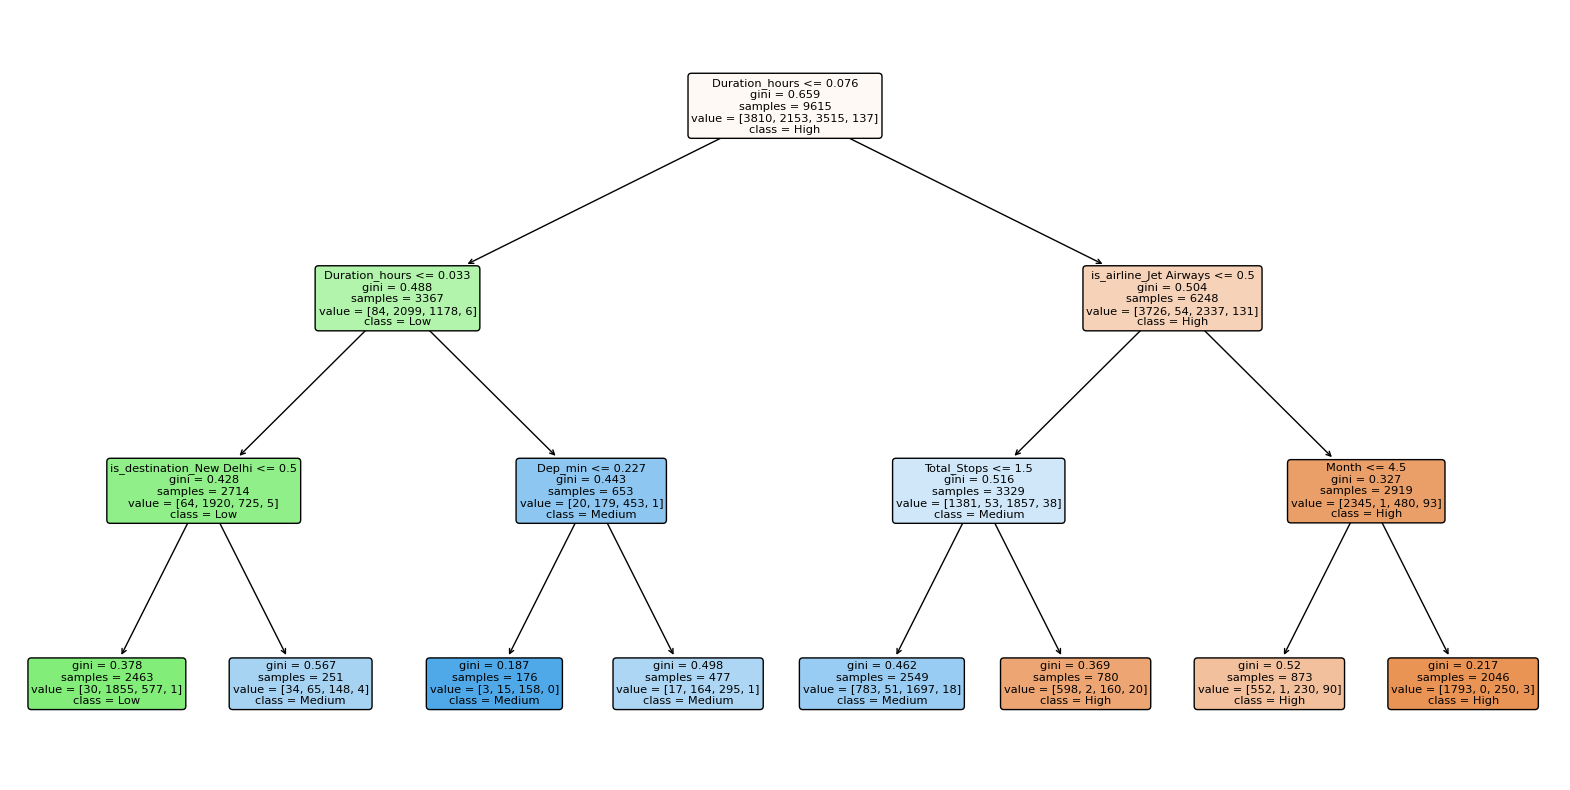

In [183]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class names to strings
class_names_str = [str(c) for c in clf9.classes_]

plt.figure(figsize=(20, 10))
plot_tree(clf9, filled=True, feature_names=X_train_kf.columns,
          class_names=class_names_str, rounded=True) # Use string class names
plt.show()

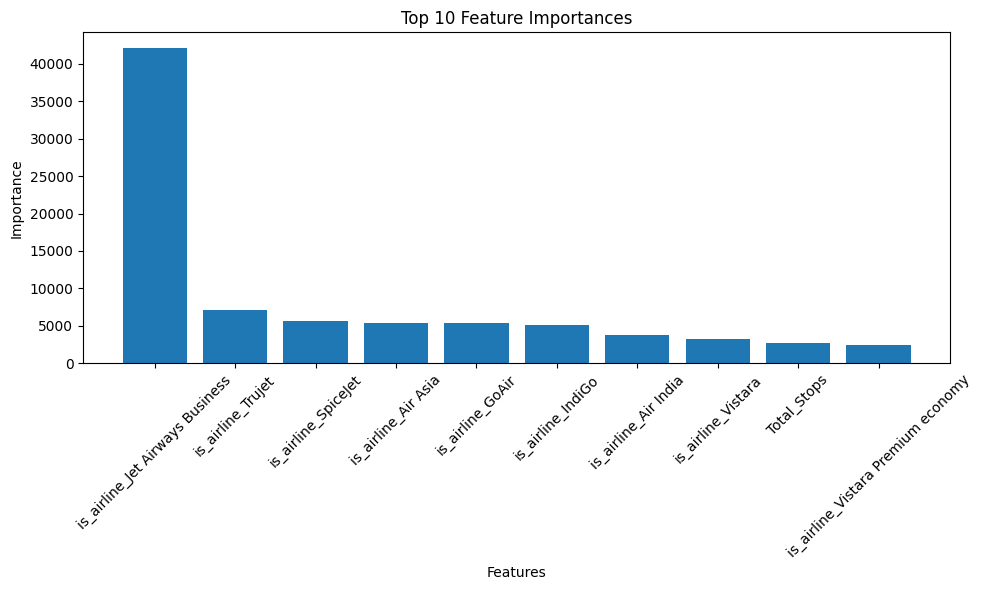

                                         feature    importance
14               is_airline_Jet Airways Business  42107.121288
18                             is_airline_Trujet   7150.326886
17                           is_airline_SpiceJet   5659.297993
9                            is_airline_Air Asia   5390.459368
11                              is_airline_GoAir   5341.553989
12                             is_airline_IndiGo   5145.298336
10                          is_airline_Air India   3758.091019
19                            is_airline_Vistara   3227.449144
0                                    Total_Stops   2739.353866
20            is_airline_Vistara Premium economy   2484.784867
15                  is_airline_Multiple carriers   1679.967854
31                      is_destination_New Delhi   1542.182339
16  is_airline_Multiple carriers Premium economy   1249.627034
28                          is_destination_Delhi   1112.007635
13                        is_airline_Jet Airways   1020

In [184]:
import matplotlib.pyplot as plt

importances20 = clf9.feature_importances_
feature_importance20 = pd.DataFrame({'feature': Features.columns, 'importance': importances20})
feature_importance20 = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance20['feature'][:10], feature_importance20['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(feature_importance20)

In [185]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import sklearn.metrics as metrics

y_pred9 = clf9.predict(X_test_kf)
accuracy_test9=metrics.accuracy_score(y_test_kf,y_pred9)
print('Accuracy of Decision Tree-Test:',accuracy_test9)

# Reshape y_test_kf to be a 2D array
acuuracy_train9=clf9.score(X_test_kf, y_test_kf.values.reshape(-1, 1))
print('Accuracy of Decision Tree-Train:',acuuracy_train9)

# Predict probabilities for Decision Tree
y_prob9 = clf9.predict_proba(X_test_kf)  # Calculate probabilities for the current model
for i in range(len(clf9.classes_)):
    roc_auc9 = roc_auc_score(y_test_kf == clf9.classes_[i], y_prob9[:, i])
    print(f"AUC ROC of Decision Tree-Test:{clf9.classes_[i]}: {roc_auc9}")
    roc_auc_general= roc_auc_score(y_test_kf, y_prob9, multi_class='ovr', average='macro')
print(f"General AUC ROC of Decision Tree-Test: {roc_auc_general}")



Accuracy of Decision Tree-Test: 0.7556179775280899
Accuracy of Decision Tree-Train: 0.7556179775280899
AUC ROC of Decision Tree-Test:High: 0.9022762254321572
AUC ROC of Decision Tree-Test:Low: 0.9462514855488764
AUC ROC of Decision Tree-Test:Medium: 0.787630315757894
AUC ROC of Decision Tree-Test:Very High: 0.8700438634213468
General AUC ROC of Decision Tree-Test: 0.8765504725400686


In [186]:
if acuuracy_train9>accuracy_test9:
  print("The classifier suffers from overfitting")
else:
  print("The classifier does not suffers from overfitting")

The classifier does not suffers from overfitting
